In [2]:
import os
import random
import torch
import numpy as np
from torchvision import models
from torch import nn, optim
from torch.optim import lr_scheduler
from torchsummary import summary

from vgg import VGG
from data_loading import Data
from model_training import train_model, plot_training_history
from model_testing import test_model, plot_examples

In [3]:
random_seed = 42
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
data_dir = 'C:/Users/weron/Pulpit/sem1/dl/proj1/archive'

In [6]:
data = Data(data_dir)

# VGG


In [7]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [8]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [9]:
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,928
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
         MaxPool2d-7           [-1, 64, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]          73,856
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
        MaxPool2d-14            [-1, 12

In [10]:
sample_input = torch.randn(1, 3, 32, 32).to(device)
model.eval()
with torch.no_grad():
    output = model(sample_input)
print(output.shape)

torch.Size([1, 10])


In [11]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.5197 Acc: 0.4356
valid Loss: 1.2692 Acc: 0.5417

Epoch 1/19
----------
train Loss: 1.1739 Acc: 0.5824
valid Loss: 1.0461 Acc: 0.6296

Epoch 2/19
----------
train Loss: 1.0202 Acc: 0.6438
valid Loss: 0.9770 Acc: 0.6508

Epoch 3/19
----------
train Loss: 0.9090 Acc: 0.6816
valid Loss: 0.8969 Acc: 0.6859

Epoch 4/19
----------
train Loss: 0.8275 Acc: 0.7123
valid Loss: 0.8802 Acc: 0.6934

Epoch 5/19
----------
train Loss: 0.7605 Acc: 0.7354
valid Loss: 0.8233 Acc: 0.7099

Epoch 6/19
----------
train Loss: 0.7012 Acc: 0.7558
valid Loss: 0.7860 Acc: 0.7248

Epoch 7/19
----------
train Loss: 0.5105 Acc: 0.8241
valid Loss: 0.6778 Acc: 0.7616

Epoch 8/19
----------
train Loss: 0.4482 Acc: 0.8454
valid Loss: 0.6871 Acc: 0.7614

Epoch 9/19
----------
train Loss: 0.4111 Acc: 0.8578
valid Loss: 0.6822 Acc: 0.7632

Epoch 10/19
----------
train Loss: 0.3729 Acc: 0.8708
valid Loss: 0.6987 Acc: 0.7621

Epoch 11/19
----------
train Loss: 0.3355 Acc: 0.8843
valid Loss

In [12]:
title = 'VGG'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

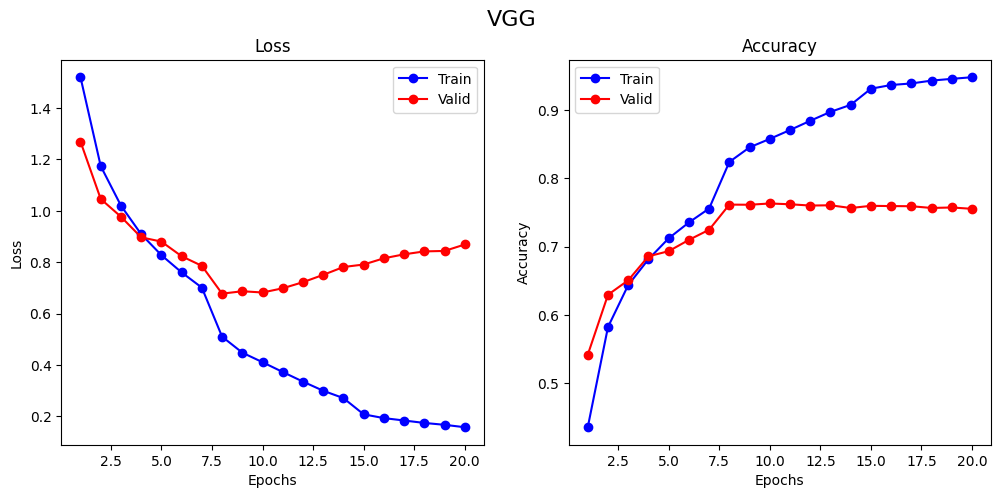

In [13]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [14]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7587

Classification Report:
              precision    recall  f1-score   support

    airplane       0.84      0.85      0.85      9000
  automobile       0.80      0.81      0.81      9000
        bird       0.75      0.73      0.74      9000
         cat       0.62      0.67      0.64      9000
        deer       0.69      0.73      0.71      9000
         dog       0.61      0.58      0.59      9000
        frog       0.84      0.86      0.85      9000
       horse       0.83      0.78      0.81      9000
        ship       0.82      0.83      0.82      9000
       truck       0.80      0.76      0.78      9000

    accuracy                           0.76     90000
   macro avg       0.76      0.76      0.76     90000
weighted avg       0.76      0.76      0.76     90000



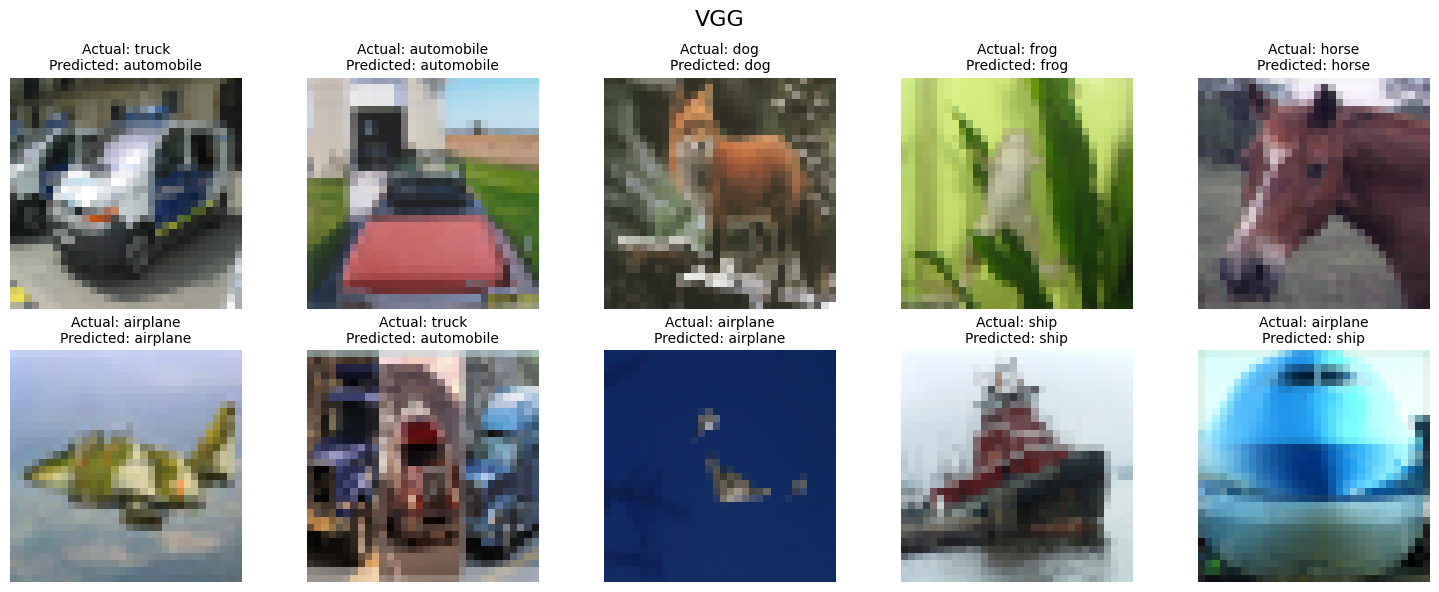

In [15]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Adam


### VGG Adam


In [16]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [17]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [18]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.4311 Acc: 0.1055
valid Loss: 2.3030 Acc: 0.1000

Epoch 1/19
----------
train Loss: 2.3031 Acc: 0.0990
valid Loss: 2.3026 Acc: 0.1000

Epoch 2/19
----------
train Loss: 2.3028 Acc: 0.0998
valid Loss: 2.3029 Acc: 0.1000

Epoch 3/19
----------
train Loss: 2.3028 Acc: 0.0980
valid Loss: 2.3026 Acc: 0.1000

Epoch 4/19
----------
train Loss: 2.3027 Acc: 0.0994
valid Loss: 2.3027 Acc: 0.1000

Epoch 5/19
----------
train Loss: 2.3028 Acc: 0.0988
valid Loss: 2.3026 Acc: 0.1000

Epoch 6/19
----------
train Loss: 2.3028 Acc: 0.0977
valid Loss: 2.3027 Acc: 0.1000

Epoch 7/19
----------
train Loss: 2.3027 Acc: 0.0997
valid Loss: 2.3026 Acc: 0.1000

Epoch 8/19
----------
train Loss: 2.3026 Acc: 0.0994
valid Loss: 2.3026 Acc: 0.1000

Epoch 9/19
----------
train Loss: 2.3026 Acc: 0.1001
valid Loss: 2.3026 Acc: 0.1000

Epoch 10/19
----------
train Loss: 2.3026 Acc: 0.0984
valid Loss: 2.3026 Acc: 0.1000

Epoch 11/19
----------
train Loss: 2.3026 Acc: 0.0982
valid Loss

In [19]:
title = 'VGG_Adam'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

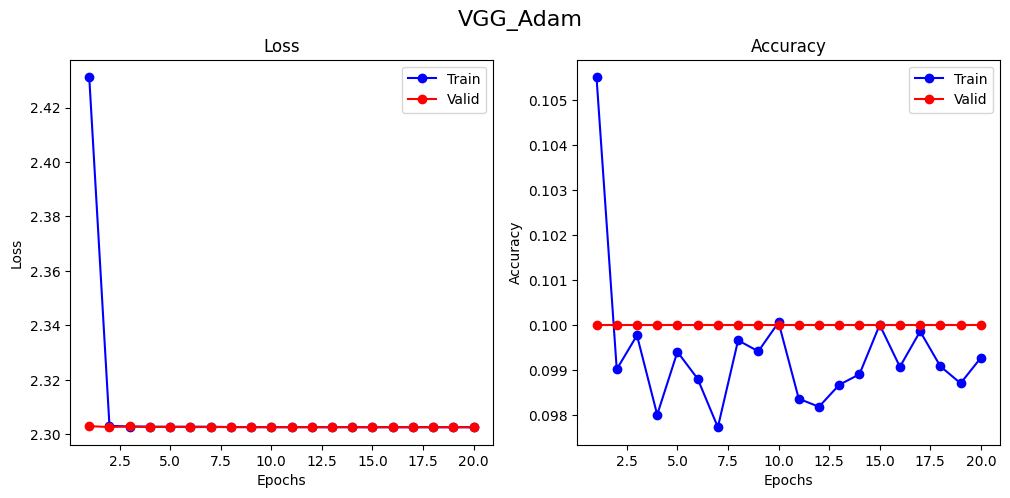

In [20]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [21]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.1000

Classification Report:
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      9000
  automobile       0.00      0.00      0.00      9000
        bird       0.00      0.00      0.00      9000
         cat       0.00      0.00      0.00      9000
        deer       0.00      0.00      0.00      9000
         dog       0.00      0.00      0.00      9000
        frog       0.00      0.00      0.00      9000
       horse       0.10      1.00      0.18      9000
        ship       0.00      0.00      0.00      9000
       truck       0.00      0.00      0.00      9000

    accuracy                           0.10     90000
   macro avg       0.01      0.10      0.02     90000
weighted avg       0.01      0.10      0.02     90000



C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

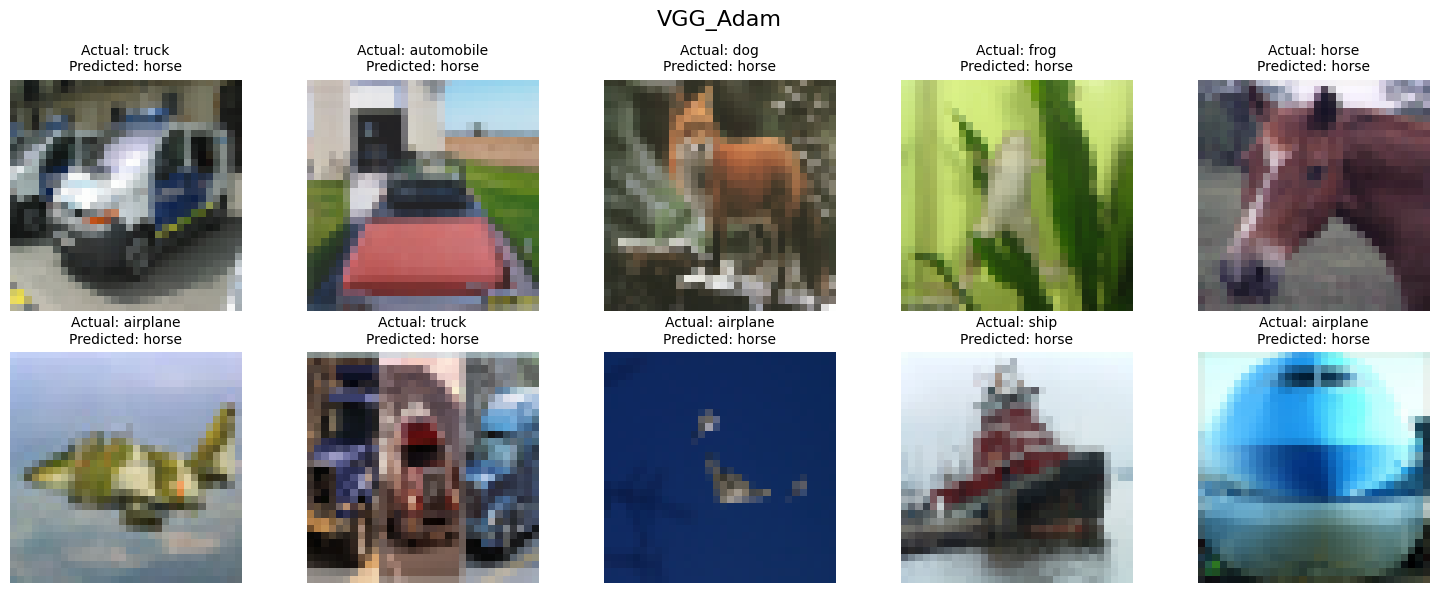

In [22]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG ADAM wd = 0.001


In [23]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [24]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [25]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.4705 Acc: 0.1084
valid Loss: 2.2898 Acc: 0.1062

Epoch 1/19
----------
train Loss: 2.0176 Acc: 0.1967
valid Loss: 1.8230 Acc: 0.2622

Epoch 2/19
----------
train Loss: 1.7757 Acc: 0.3020
valid Loss: 1.7673 Acc: 0.2843

Epoch 3/19
----------
train Loss: 1.5827 Acc: 0.3730
valid Loss: 1.4774 Acc: 0.4213

Epoch 4/19
----------
train Loss: 1.4599 Acc: 0.4381
valid Loss: 1.3905 Acc: 0.4849

Epoch 5/19
----------
train Loss: 1.3630 Acc: 0.4912
valid Loss: 1.3180 Acc: 0.5230

Epoch 6/19
----------
train Loss: 1.3050 Acc: 0.5227
valid Loss: 1.2488 Acc: 0.5470

Epoch 7/19
----------
train Loss: 1.1214 Acc: 0.5915
valid Loss: 1.0543 Acc: 0.6115

Epoch 8/19
----------
train Loss: 1.0773 Acc: 0.6102
valid Loss: 1.0295 Acc: 0.6238

Epoch 9/19
----------
train Loss: 1.0563 Acc: 0.6173
valid Loss: 1.0181 Acc: 0.6278

Epoch 10/19
----------
train Loss: 1.0350 Acc: 0.6245
valid Loss: 0.9984 Acc: 0.6346

Epoch 11/19
----------
train Loss: 1.0199 Acc: 0.6325
valid Loss

In [26]:
title = 'VGG_Adam_WG0001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

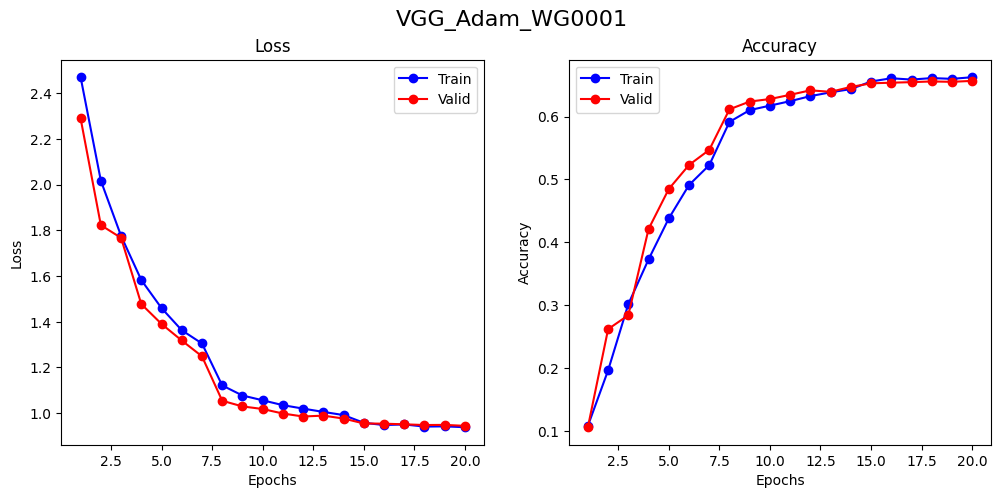

In [27]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [28]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.6531

Classification Report:
              precision    recall  f1-score   support

    airplane       0.80      0.75      0.77      9000
  automobile       0.75      0.74      0.75      9000
        bird       0.59      0.60      0.60      9000
         cat       0.48      0.49      0.48      9000
        deer       0.50      0.59      0.54      9000
         dog       0.51      0.40      0.45      9000
        frog       0.75      0.77      0.76      9000
       horse       0.72      0.71      0.71      9000
        ship       0.71      0.79      0.75      9000
       truck       0.73      0.70      0.71      9000

    accuracy                           0.65     90000
   macro avg       0.65      0.65      0.65     90000
weighted avg       0.65      0.65      0.65     90000



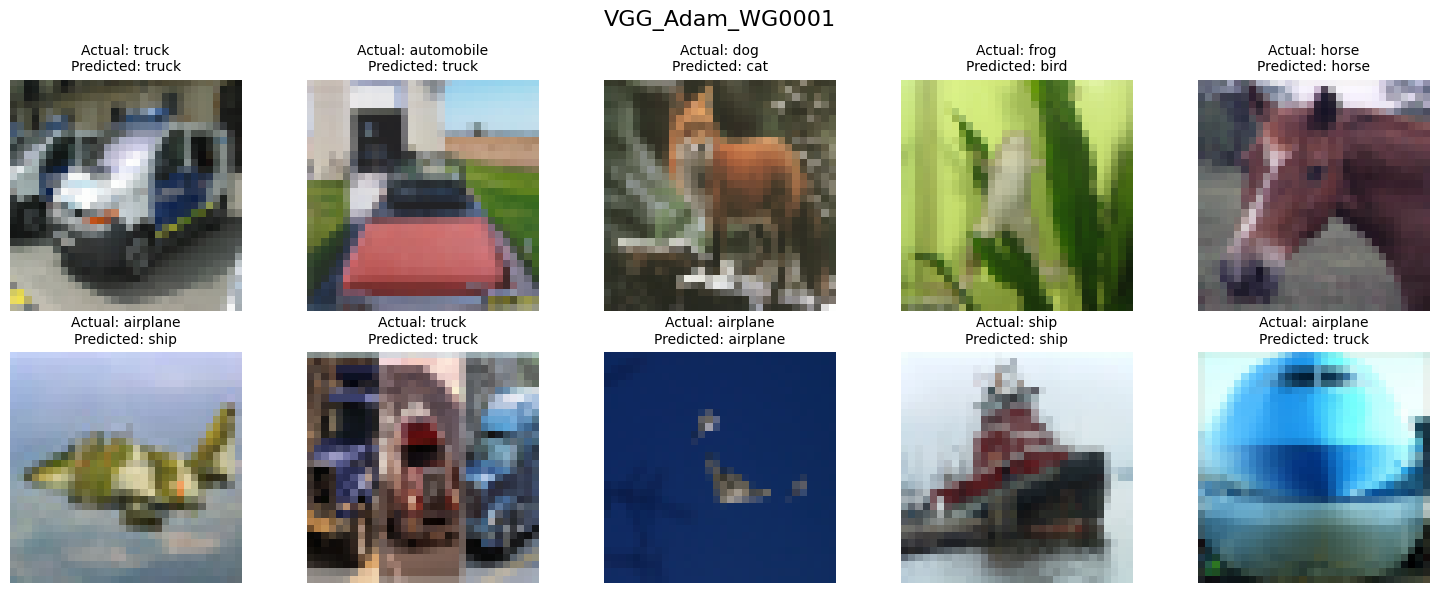

In [29]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG ADAM wd = 0.01


In [30]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [31]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [32]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.3402 Acc: 0.1360
valid Loss: 1.9793 Acc: 0.1890

Epoch 1/19
----------
train Loss: 1.8989 Acc: 0.2249
valid Loss: 1.8091 Acc: 0.2849

Epoch 2/19
----------
train Loss: 1.8424 Acc: 0.2620
valid Loss: 1.8684 Acc: 0.2449

Epoch 3/19
----------
train Loss: 1.8170 Acc: 0.2774
valid Loss: 1.7686 Acc: 0.2793

Epoch 4/19
----------
train Loss: 1.7941 Acc: 0.2908
valid Loss: 2.0099 Acc: 0.2331

Epoch 5/19
----------
train Loss: 1.7863 Acc: 0.2960
valid Loss: 1.7520 Acc: 0.2985

Epoch 6/19
----------
train Loss: 1.7692 Acc: 0.3031
valid Loss: 1.6648 Acc: 0.3381

Epoch 7/19
----------
train Loss: 1.6200 Acc: 0.3551
valid Loss: 1.5332 Acc: 0.3766

Epoch 8/19
----------
train Loss: 1.5619 Acc: 0.3759
valid Loss: 1.5097 Acc: 0.3861

Epoch 9/19
----------
train Loss: 1.5333 Acc: 0.3825
valid Loss: 1.4735 Acc: 0.4048

Epoch 10/19
----------
train Loss: 1.5137 Acc: 0.3918
valid Loss: 1.4608 Acc: 0.4088

Epoch 11/19
----------
train Loss: 1.4954 Acc: 0.4000
valid Loss

In [33]:
title = 'VGG_Adam_WG001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

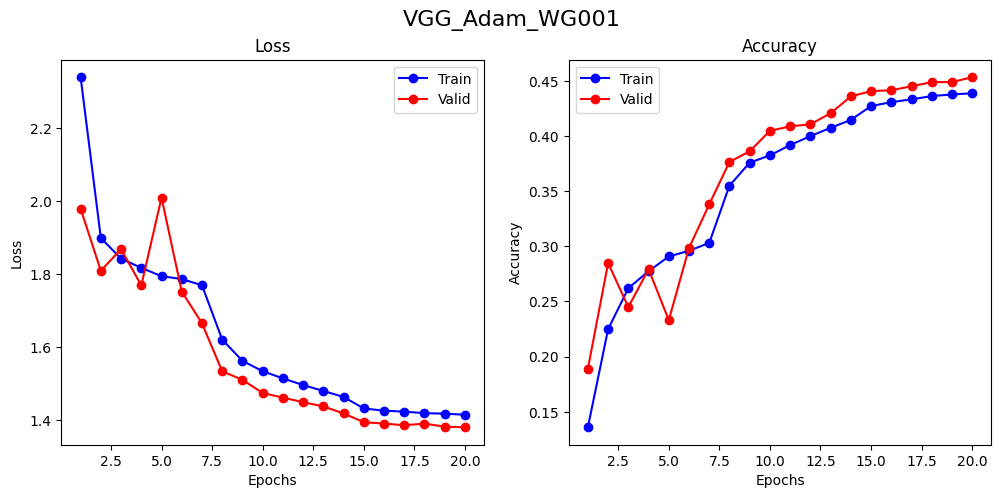

In [34]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [35]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.4492

Classification Report:
              precision    recall  f1-score   support

    airplane       0.62      0.58      0.60      9000
  automobile       0.53      0.54      0.54      9000
        bird       0.24      0.17      0.20      9000
         cat       0.29      0.27      0.28      9000
        deer       0.33      0.24      0.28      9000
         dog       0.28      0.31      0.29      9000
        frog       0.56      0.77      0.65      9000
       horse       0.61      0.63      0.62      9000
        ship       0.44      0.56      0.49      9000
       truck       0.49      0.43      0.46      9000

    accuracy                           0.45     90000
   macro avg       0.44      0.45      0.44     90000
weighted avg       0.44      0.45      0.44     90000



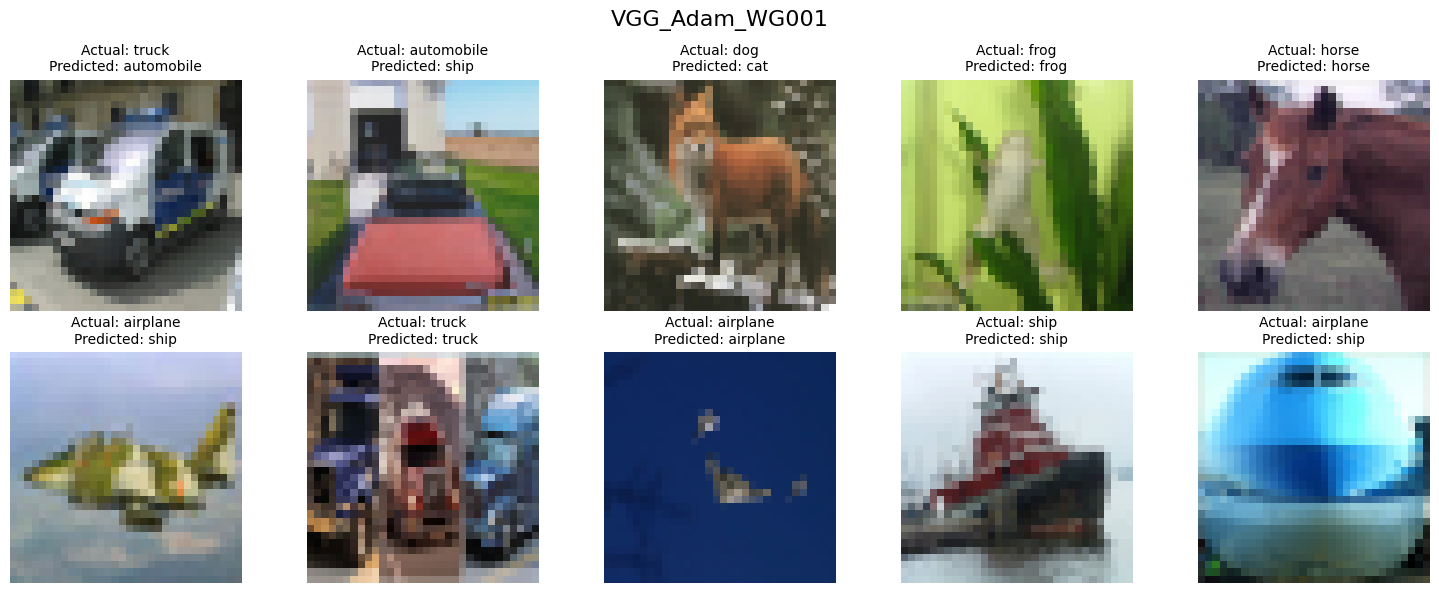

In [36]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Weight decay


### VGG SGD wd = 0.001


In [37]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [38]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [39]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.5225 Acc: 0.4348
valid Loss: 1.2835 Acc: 0.5368

Epoch 1/19
----------
train Loss: 1.1756 Acc: 0.5807
valid Loss: 1.0406 Acc: 0.6285

Epoch 2/19
----------
train Loss: 1.0214 Acc: 0.6431
valid Loss: 0.9842 Acc: 0.6561

Epoch 3/19
----------
train Loss: 0.9180 Acc: 0.6809
valid Loss: 0.9300 Acc: 0.6764

Epoch 4/19
----------
train Loss: 0.8387 Acc: 0.7081
valid Loss: 0.8437 Acc: 0.7015

Epoch 5/19
----------
train Loss: 0.7736 Acc: 0.7302
valid Loss: 0.8741 Acc: 0.6881

Epoch 6/19
----------
train Loss: 0.7169 Acc: 0.7492
valid Loss: 0.8045 Acc: 0.7212

Epoch 7/19
----------
train Loss: 0.5216 Acc: 0.8185
valid Loss: 0.6711 Acc: 0.7646

Epoch 8/19
----------
train Loss: 0.4623 Acc: 0.8398
valid Loss: 0.6725 Acc: 0.7665

Epoch 9/19
----------
train Loss: 0.4183 Acc: 0.8556
valid Loss: 0.6801 Acc: 0.7656

Epoch 10/19
----------
train Loss: 0.3798 Acc: 0.8687
valid Loss: 0.6976 Acc: 0.7682

Epoch 11/19
----------
train Loss: 0.3456 Acc: 0.8815
valid Loss

In [40]:
title = 'VGG_SGD_WD0001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

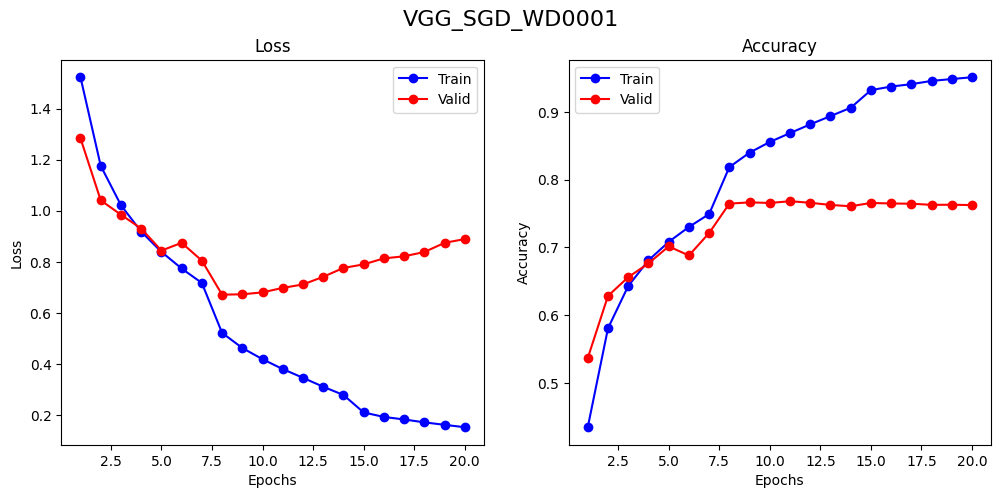

In [41]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [42]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7620

Classification Report:
              precision    recall  f1-score   support

    airplane       0.83      0.85      0.84      9000
  automobile       0.81      0.80      0.81      9000
        bird       0.69      0.79      0.73      9000
         cat       0.67      0.61      0.64      9000
        deer       0.71      0.70      0.71      9000
         dog       0.62      0.60      0.61      9000
        frog       0.86      0.85      0.85      9000
       horse       0.81      0.82      0.81      9000
        ship       0.82      0.83      0.82      9000
       truck       0.79      0.78      0.79      9000

    accuracy                           0.76     90000
   macro avg       0.76      0.76      0.76     90000
weighted avg       0.76      0.76      0.76     90000



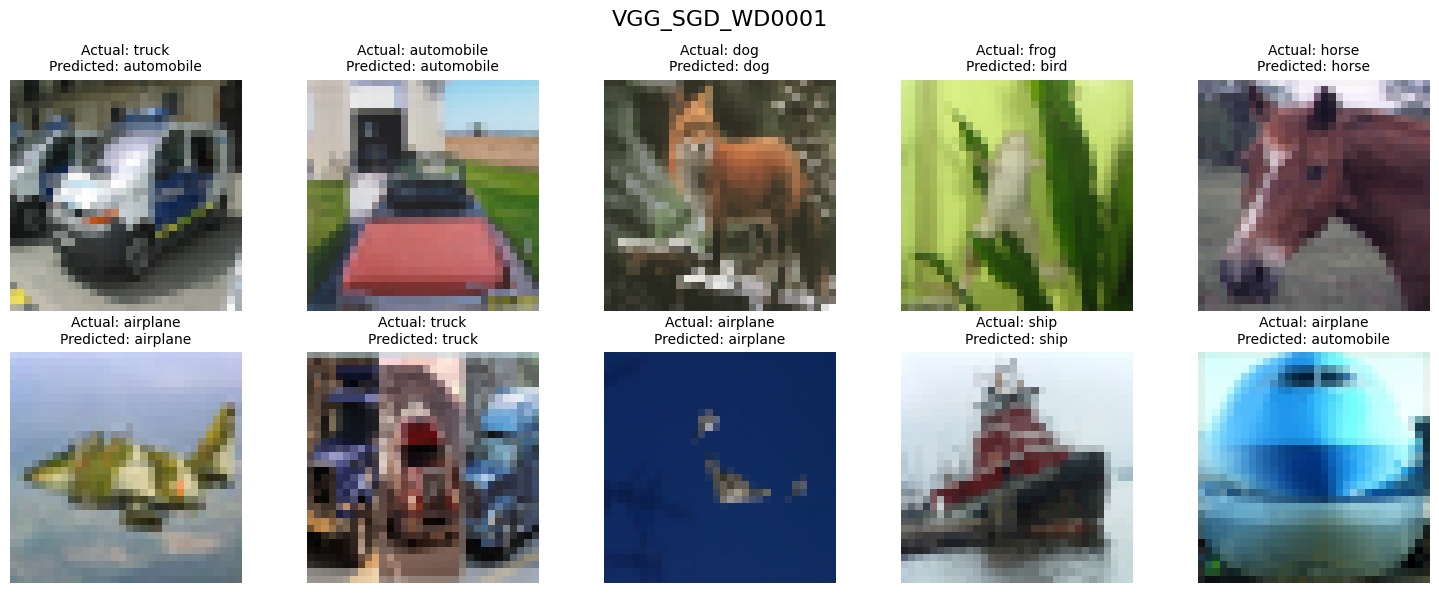

In [43]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG SGD wd = 0.01


In [44]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [45]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [46]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.5168 Acc: 0.4347
valid Loss: 1.2497 Acc: 0.5481

Epoch 1/19
----------
train Loss: 1.1896 Acc: 0.5775
valid Loss: 1.1413 Acc: 0.5905

Epoch 2/19
----------
train Loss: 1.0603 Acc: 0.6287
valid Loss: 1.1015 Acc: 0.6148

Epoch 3/19
----------
train Loss: 0.9817 Acc: 0.6587
valid Loss: 0.9607 Acc: 0.6638

Epoch 4/19
----------
train Loss: 0.9225 Acc: 0.6801
valid Loss: 0.9099 Acc: 0.6842

Epoch 5/19
----------
train Loss: 0.8808 Acc: 0.6944
valid Loss: 0.9506 Acc: 0.6630

Epoch 6/19
----------
train Loss: 0.8496 Acc: 0.7076
valid Loss: 0.8537 Acc: 0.7009

Epoch 7/19
----------
train Loss: 0.6164 Acc: 0.7892
valid Loss: 0.6457 Acc: 0.7749

Epoch 8/19
----------
train Loss: 0.5475 Acc: 0.8125
valid Loss: 0.6282 Acc: 0.7804

Epoch 9/19
----------
train Loss: 0.5014 Acc: 0.8285
valid Loss: 0.6208 Acc: 0.7833

Epoch 10/19
----------
train Loss: 0.4643 Acc: 0.8415
valid Loss: 0.6274 Acc: 0.7835

Epoch 11/19
----------
train Loss: 0.4322 Acc: 0.8544
valid Loss

In [47]:
title = 'VGG_SGD_WD001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

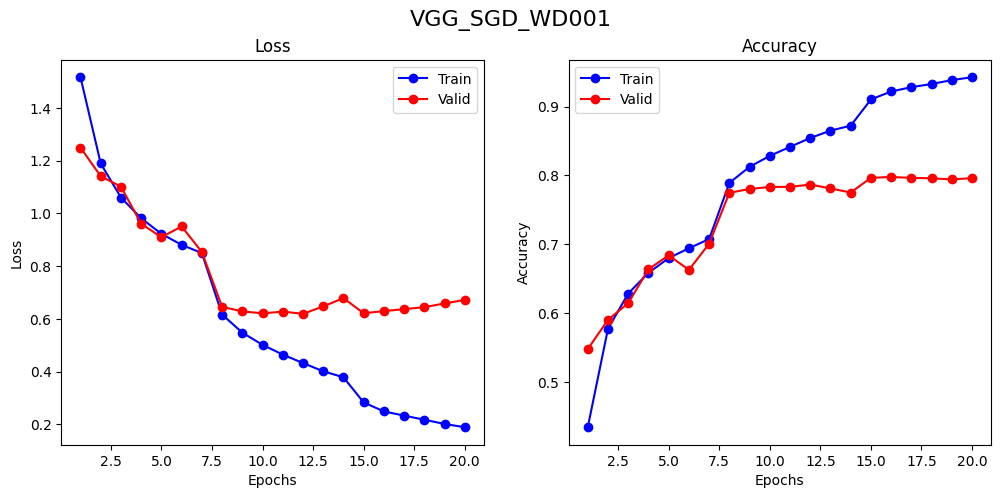

In [48]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [49]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7923

Classification Report:
              precision    recall  f1-score   support

    airplane       0.84      0.89      0.86      9000
  automobile       0.82      0.82      0.82      9000
        bird       0.77      0.78      0.78      9000
         cat       0.67      0.72      0.69      9000
        deer       0.74      0.75      0.74      9000
         dog       0.69      0.62      0.65      9000
        frog       0.88      0.88      0.88      9000
       horse       0.85      0.83      0.84      9000
        ship       0.85      0.85      0.85      9000
       truck       0.81      0.79      0.80      9000

    accuracy                           0.79     90000
   macro avg       0.79      0.79      0.79     90000
weighted avg       0.79      0.79      0.79     90000



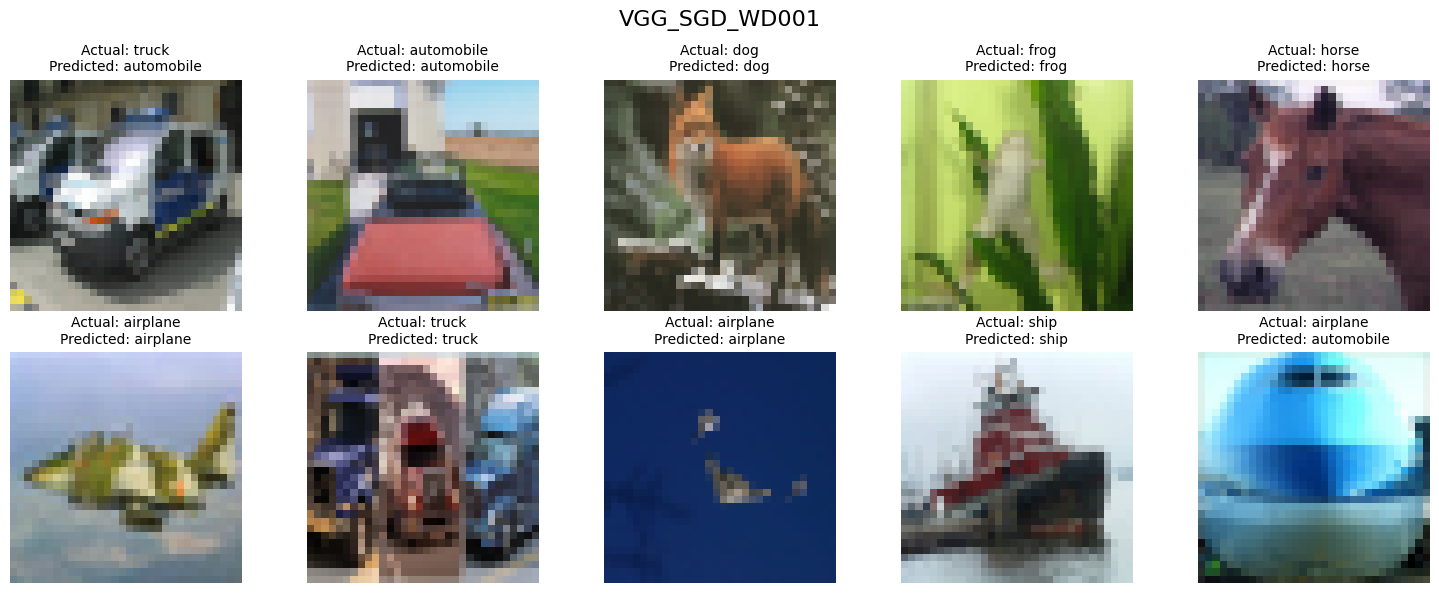

In [50]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG SGD wd = 0.1


In [51]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [52]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.1)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [53]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.6405 Acc: 0.3775
valid Loss: 1.6145 Acc: 0.4064

Epoch 1/19
----------
train Loss: 1.5439 Acc: 0.4217
valid Loss: 1.5099 Acc: 0.4357

Epoch 2/19
----------
train Loss: 1.5385 Acc: 0.4222
valid Loss: 1.5431 Acc: 0.4306

Epoch 3/19
----------
train Loss: 1.5460 Acc: 0.4169
valid Loss: 1.6645 Acc: 0.3740

Epoch 4/19
----------
train Loss: 1.5496 Acc: 0.4151
valid Loss: 1.6162 Acc: 0.4010

Epoch 5/19
----------
train Loss: 1.5540 Acc: 0.4130
valid Loss: 1.6041 Acc: 0.4063

Epoch 6/19
----------
train Loss: 1.5594 Acc: 0.4097
valid Loss: 1.8351 Acc: 0.3279

Epoch 7/19
----------
train Loss: 1.3504 Acc: 0.4929
valid Loss: 1.2670 Acc: 0.5132

Epoch 8/19
----------
train Loss: 1.2825 Acc: 0.5169
valid Loss: 1.2473 Acc: 0.5326

Epoch 9/19
----------
train Loss: 1.2487 Acc: 0.5407
valid Loss: 1.2236 Acc: 0.5478

Epoch 10/19
----------
train Loss: 1.2096 Acc: 0.5706
valid Loss: 1.2540 Acc: 0.5603

Epoch 11/19
----------
train Loss: 1.1751 Acc: 0.5936
valid Loss

In [54]:
title = 'VGG_SGD_WD01'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

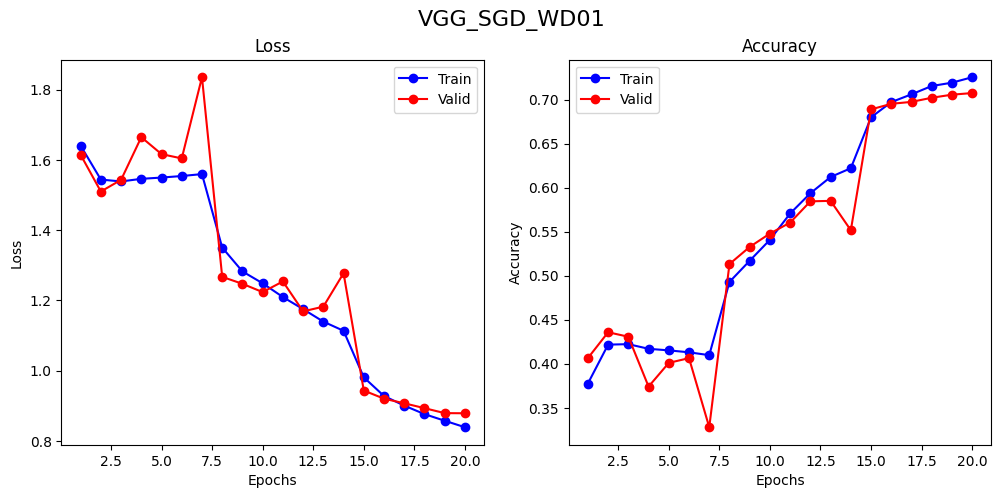

In [55]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [56]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7045

Classification Report:
              precision    recall  f1-score   support

    airplane       0.89      0.75      0.81      9000
  automobile       0.77      0.81      0.79      9000
        bird       0.70      0.67      0.68      9000
         cat       0.52      0.50      0.51      9000
        deer       0.64      0.62      0.63      9000
         dog       0.49      0.43      0.46      9000
        frog       0.76      0.87      0.81      9000
       horse       0.76      0.80      0.78      9000
        ship       0.76      0.84      0.80      9000
       truck       0.74      0.75      0.74      9000

    accuracy                           0.70     90000
   macro avg       0.70      0.70      0.70     90000
weighted avg       0.70      0.70      0.70     90000



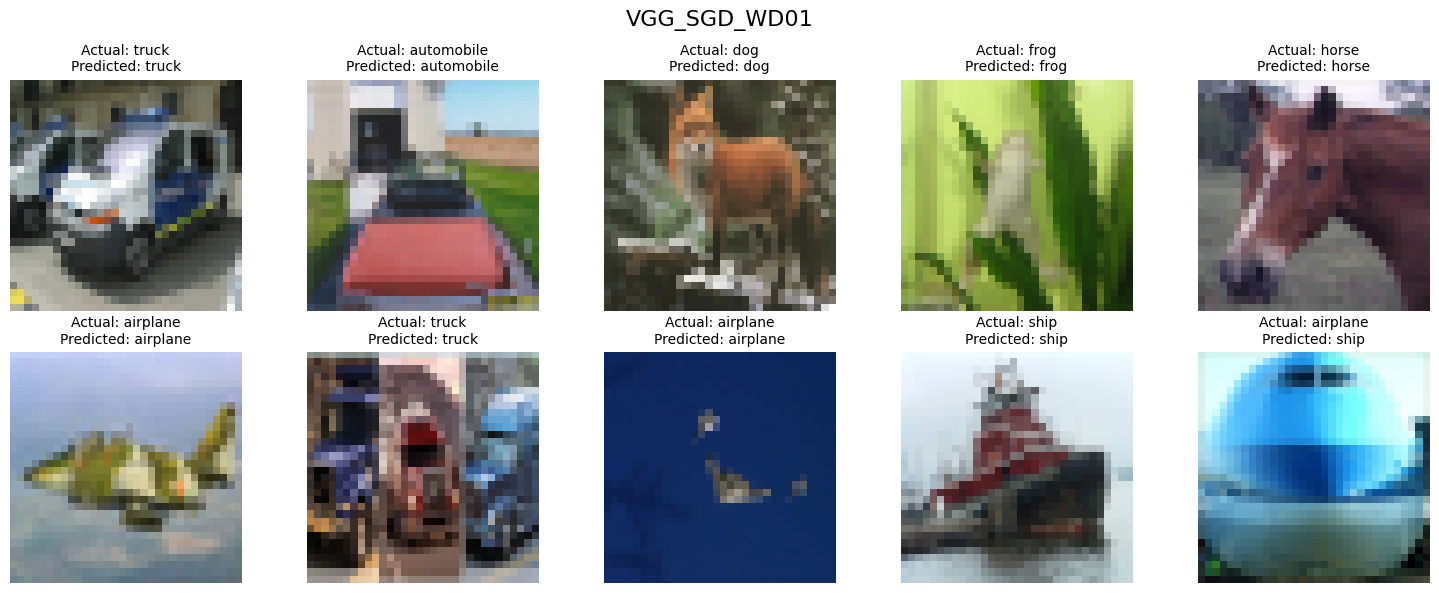

In [57]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Learning rate


### VGG SGD lr = 0.01


In [58]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [59]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [60]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.3123 Acc: 0.1071
valid Loss: 2.3035 Acc: 0.1000

Epoch 1/19
----------
train Loss: 2.3037 Acc: 0.0987
valid Loss: 2.3028 Acc: 0.1000

Epoch 2/19
----------
train Loss: 2.3035 Acc: 0.0972
valid Loss: 2.3034 Acc: 0.1000

Epoch 3/19
----------
train Loss: 2.3036 Acc: 0.0977
valid Loss: 2.3033 Acc: 0.1000

Epoch 4/19
----------
train Loss: 2.3034 Acc: 0.1003
valid Loss: 2.3037 Acc: 0.1000

Epoch 5/19
----------
train Loss: 2.3034 Acc: 0.1006
valid Loss: 2.3029 Acc: 0.1000

Epoch 6/19
----------
train Loss: 2.3034 Acc: 0.0991
valid Loss: 2.3034 Acc: 0.1000

Epoch 7/19
----------
train Loss: 2.3028 Acc: 0.0989
valid Loss: 2.3026 Acc: 0.1000

Epoch 8/19
----------
train Loss: 2.3027 Acc: 0.0989
valid Loss: 2.3026 Acc: 0.1000

Epoch 9/19
----------
train Loss: 2.3027 Acc: 0.0994
valid Loss: 2.3026 Acc: 0.1000

Epoch 10/19
----------
train Loss: 2.3027 Acc: 0.0974
valid Loss: 2.3026 Acc: 0.1000

Epoch 11/19
----------
train Loss: 2.3027 Acc: 0.0982
valid Loss

In [61]:
title = 'VGG_SGD_LR001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

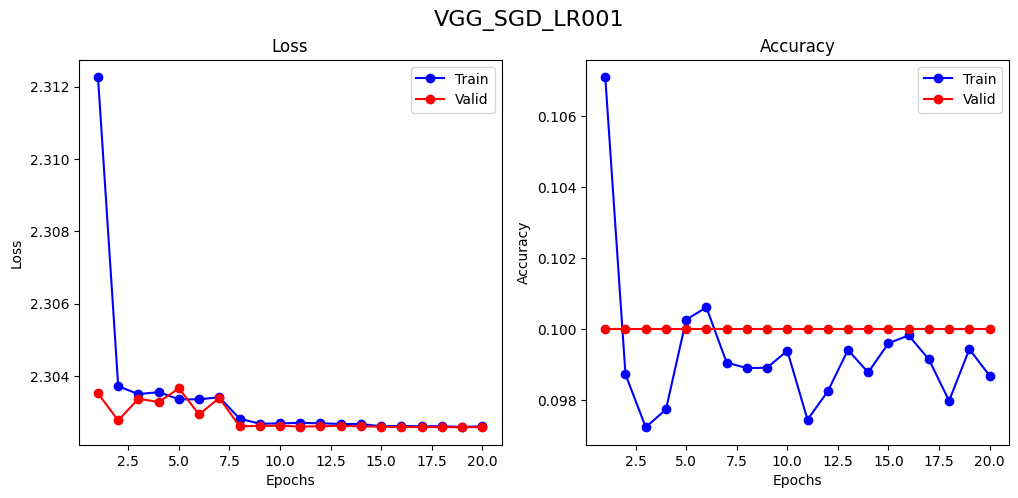

In [62]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [63]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.1000

Classification Report:
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      9000
  automobile       0.00      0.00      0.00      9000
        bird       0.00      0.00      0.00      9000
         cat       0.00      0.00      0.00      9000
        deer       0.00      0.00      0.00      9000
         dog       0.00      0.00      0.00      9000
        frog       0.00      0.00      0.00      9000
       horse       0.10      1.00      0.18      9000
        ship       0.00      0.00      0.00      9000
       truck       0.00      0.00      0.00      9000

    accuracy                           0.10     90000
   macro avg       0.01      0.10      0.02     90000
weighted avg       0.01      0.10      0.02     90000



C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

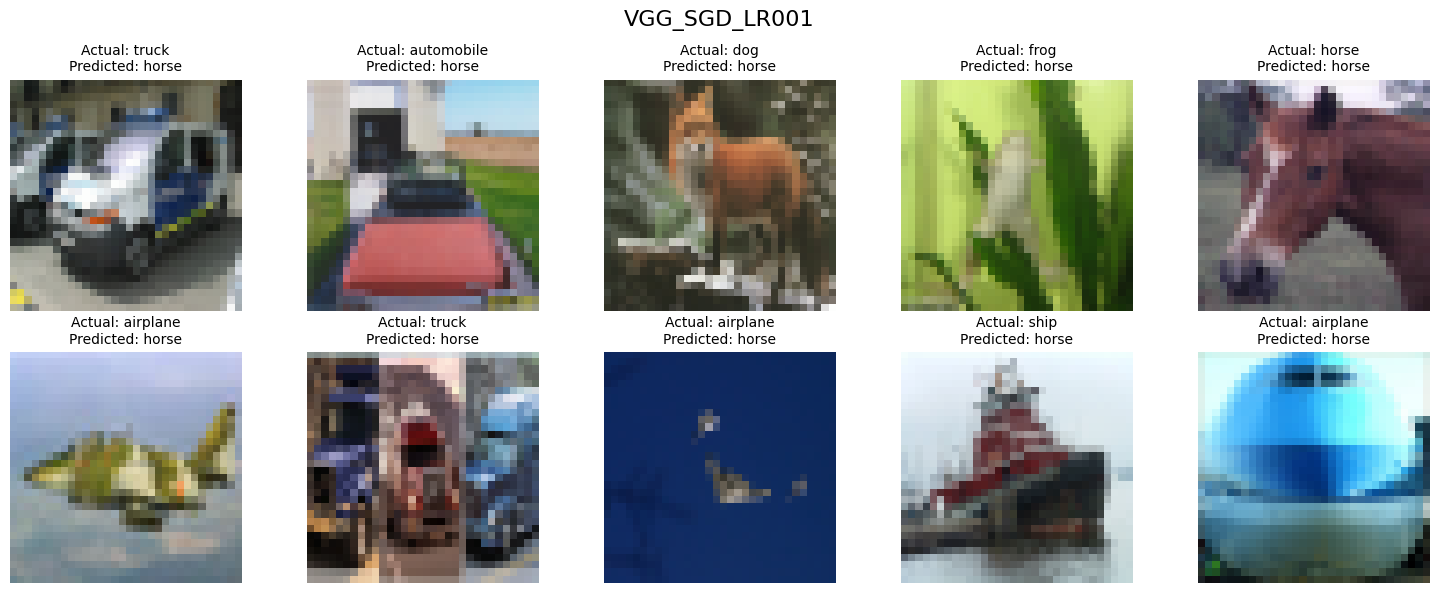

In [64]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG SGD lr = 0.1


In [65]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [66]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [67]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: nan Acc: 0.0999
valid Loss: nan Acc: 0.1000

Epoch 1/19
----------
train Loss: nan Acc: 0.1000
valid Loss: nan Acc: 0.1000

Epoch 2/19
----------
train Loss: nan Acc: 0.1000
valid Loss: nan Acc: 0.1000

Epoch 3/19
----------
train Loss: nan Acc: 0.1000
valid Loss: nan Acc: 0.1000

Epoch 4/19
----------
train Loss: nan Acc: 0.1000
valid Loss: nan Acc: 0.1000

Epoch 5/19
----------
train Loss: nan Acc: 0.1000
valid Loss: nan Acc: 0.1000

Epoch 6/19
----------
train Loss: nan Acc: 0.1000
valid Loss: nan Acc: 0.1000

Epoch 7/19
----------
train Loss: nan Acc: 0.1000
valid Loss: nan Acc: 0.1000

Epoch 8/19
----------
train Loss: nan Acc: 0.1000
valid Loss: nan Acc: 0.1000

Epoch 9/19
----------
train Loss: nan Acc: 0.1000
valid Loss: nan Acc: 0.1000

Epoch 10/19
----------
train Loss: nan Acc: 0.1000
valid Loss: nan Acc: 0.1000

Epoch 11/19
----------
train Loss: nan Acc: 0.1000
valid Loss: nan Acc: 0.1000

Epoch 12/19
----------
train Loss: nan Acc: 0.1000

In [68]:
title = 'VGG_SGD_LR01'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

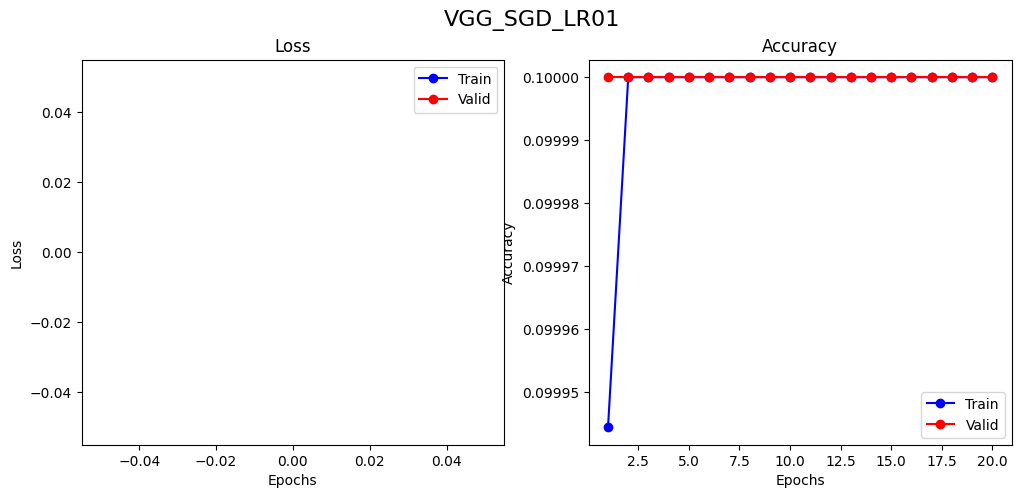

In [69]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [70]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.1000

Classification Report:
              precision    recall  f1-score   support

    airplane       0.10      1.00      0.18      9000
  automobile       0.00      0.00      0.00      9000
        bird       0.00      0.00      0.00      9000
         cat       0.00      0.00      0.00      9000
        deer       0.00      0.00      0.00      9000
         dog       0.00      0.00      0.00      9000
        frog       0.00      0.00      0.00      9000
       horse       0.00      0.00      0.00      9000
        ship       0.00      0.00      0.00      9000
       truck       0.00      0.00      0.00      9000

    accuracy                           0.10     90000
   macro avg       0.01      0.10      0.02     90000
weighted avg       0.01      0.10      0.02     90000



C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

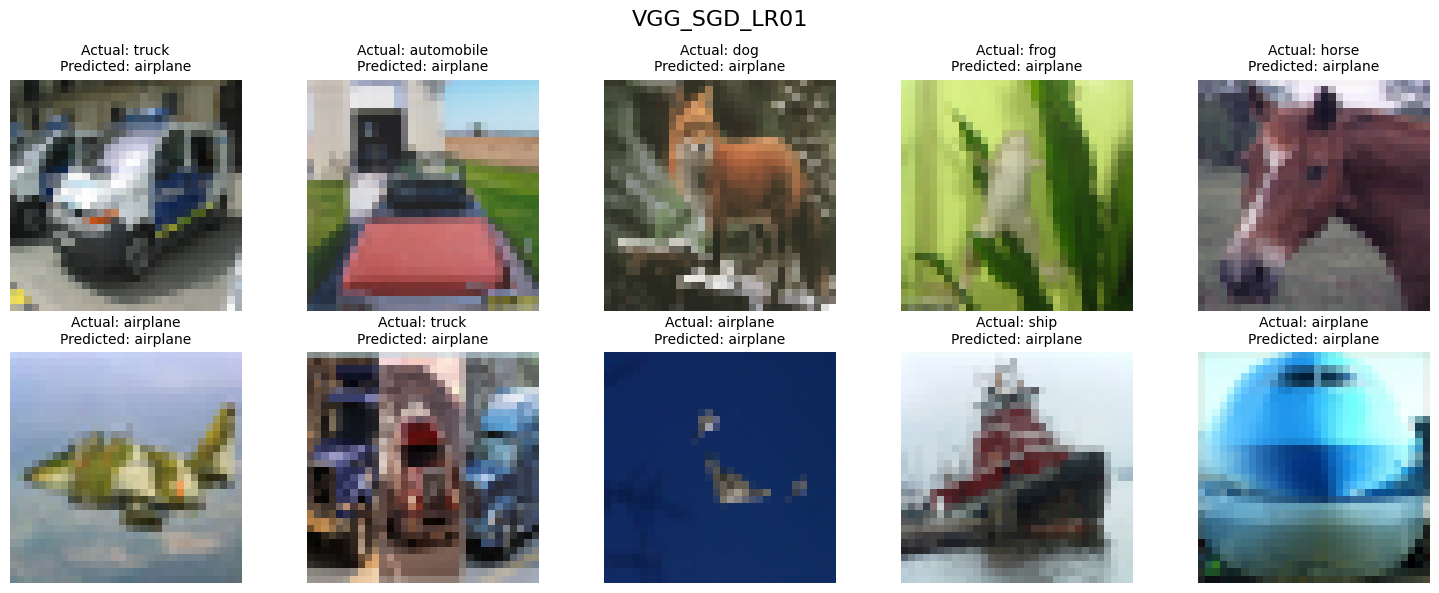

In [71]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Momentum


### VGG SGD momentum = 0


In [72]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [73]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [74]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.6764 Acc: 0.3661
valid Loss: 1.3853 Acc: 0.4923

Epoch 1/19
----------
train Loss: 1.3187 Acc: 0.5160
valid Loss: 1.1957 Acc: 0.5617

Epoch 2/19
----------
train Loss: 1.1703 Acc: 0.5769
valid Loss: 1.1036 Acc: 0.6010

Epoch 3/19
----------
train Loss: 1.0654 Acc: 0.6176
valid Loss: 1.0448 Acc: 0.6236

Epoch 4/19
----------
train Loss: 0.9831 Acc: 0.6502
valid Loss: 1.0230 Acc: 0.6364

Epoch 5/19
----------
train Loss: 0.9104 Acc: 0.6767
valid Loss: 1.0051 Acc: 0.6437

Epoch 6/19
----------
train Loss: 0.8517 Acc: 0.6971
valid Loss: 1.0138 Acc: 0.6435

Epoch 7/19
----------
train Loss: 0.6911 Acc: 0.7592
valid Loss: 0.9039 Acc: 0.6837

Epoch 8/19
----------
train Loss: 0.6406 Acc: 0.7781
valid Loss: 0.9147 Acc: 0.6841

Epoch 9/19
----------
train Loss: 0.6086 Acc: 0.7885
valid Loss: 0.9228 Acc: 0.6829

Epoch 10/19
----------
train Loss: 0.5750 Acc: 0.8016
valid Loss: 0.9439 Acc: 0.6826

Epoch 11/19
----------
train Loss: 0.5485 Acc: 0.8102
valid Loss

In [75]:
title = 'VGG_SGD_M0'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

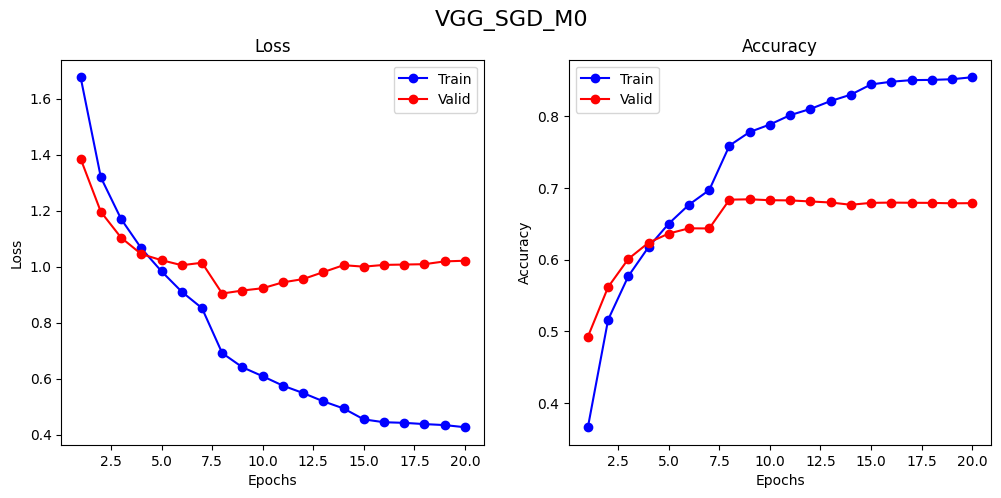

In [76]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [77]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.6823

Classification Report:
              precision    recall  f1-score   support

    airplane       0.79      0.78      0.78      9000
  automobile       0.74      0.75      0.75      9000
        bird       0.62      0.65      0.64      9000
         cat       0.55      0.52      0.54      9000
        deer       0.58      0.63      0.60      9000
         dog       0.57      0.43      0.49      9000
        frog       0.75      0.81      0.78      9000
       horse       0.73      0.75      0.74      9000
        ship       0.75      0.77      0.76      9000
       truck       0.73      0.72      0.73      9000

    accuracy                           0.68     90000
   macro avg       0.68      0.68      0.68     90000
weighted avg       0.68      0.68      0.68     90000



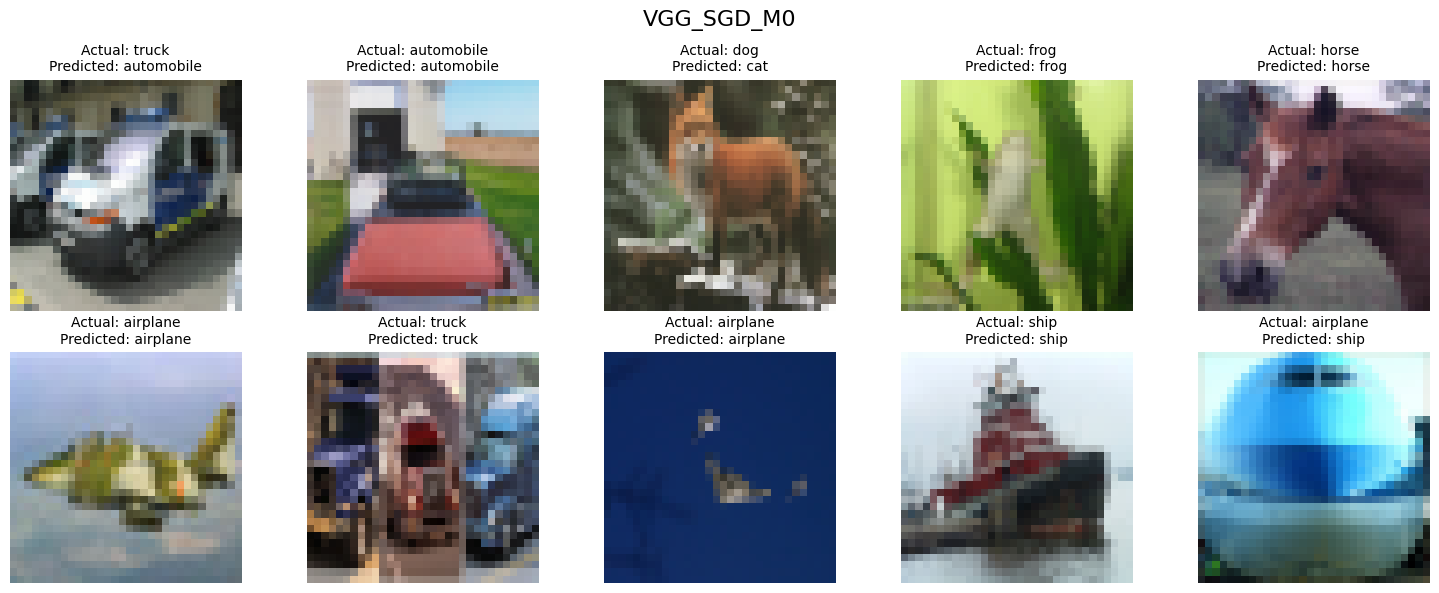

In [78]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG SGD momentum = 0.5


In [79]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [80]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [81]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.5827 Acc: 0.4055
valid Loss: 1.3328 Acc: 0.5145

Epoch 1/19
----------
train Loss: 1.2413 Acc: 0.5490
valid Loss: 1.1253 Acc: 0.5897

Epoch 2/19
----------
train Loss: 1.0915 Acc: 0.6099
valid Loss: 1.0566 Acc: 0.6203

Epoch 3/19
----------
train Loss: 0.9872 Acc: 0.6483
valid Loss: 0.9872 Acc: 0.6492

Epoch 4/19
----------
train Loss: 0.9031 Acc: 0.6808
valid Loss: 0.9584 Acc: 0.6624

Epoch 5/19
----------
train Loss: 0.8306 Acc: 0.7064
valid Loss: 1.0061 Acc: 0.6447

Epoch 6/19
----------
train Loss: 0.7717 Acc: 0.7278
valid Loss: 0.8962 Acc: 0.6822

Epoch 7/19
----------
train Loss: 0.5900 Acc: 0.7946
valid Loss: 0.8296 Acc: 0.7131

Epoch 8/19
----------
train Loss: 0.5317 Acc: 0.8157
valid Loss: 0.8414 Acc: 0.7140

Epoch 9/19
----------
train Loss: 0.4902 Acc: 0.8312
valid Loss: 0.8567 Acc: 0.7115

Epoch 10/19
----------
train Loss: 0.4525 Acc: 0.8444
valid Loss: 0.8812 Acc: 0.7120

Epoch 11/19
----------
train Loss: 0.4220 Acc: 0.8552
valid Loss

In [82]:
title = 'VGG_SGD_M05'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

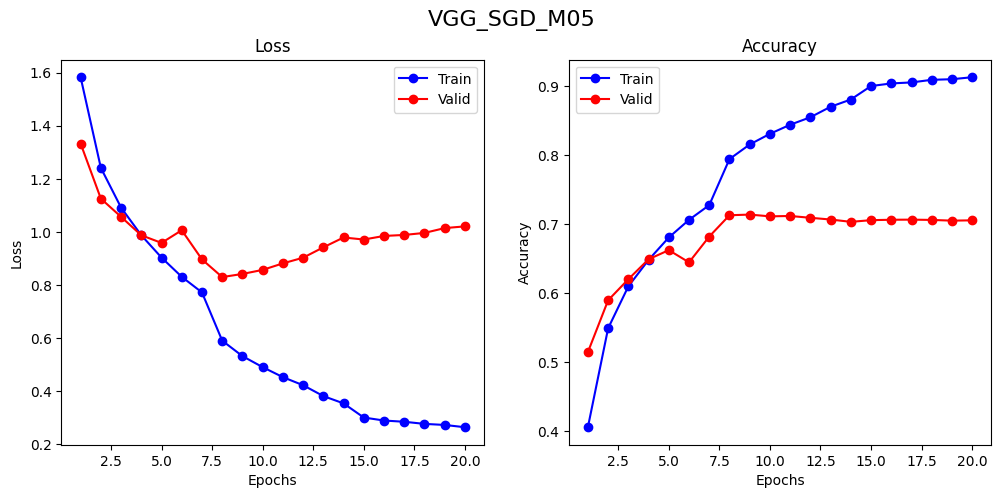

In [83]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [84]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7103

Classification Report:
              precision    recall  f1-score   support

    airplane       0.79      0.81      0.80      9000
  automobile       0.78      0.76      0.77      9000
        bird       0.67      0.68      0.67      9000
         cat       0.60      0.55      0.57      9000
        deer       0.59      0.68      0.63      9000
         dog       0.61      0.48      0.54      9000
        frog       0.78      0.83      0.81      9000
       horse       0.76      0.76      0.76      9000
        ship       0.75      0.81      0.78      9000
       truck       0.75      0.75      0.75      9000

    accuracy                           0.71     90000
   macro avg       0.71      0.71      0.71     90000
weighted avg       0.71      0.71      0.71     90000



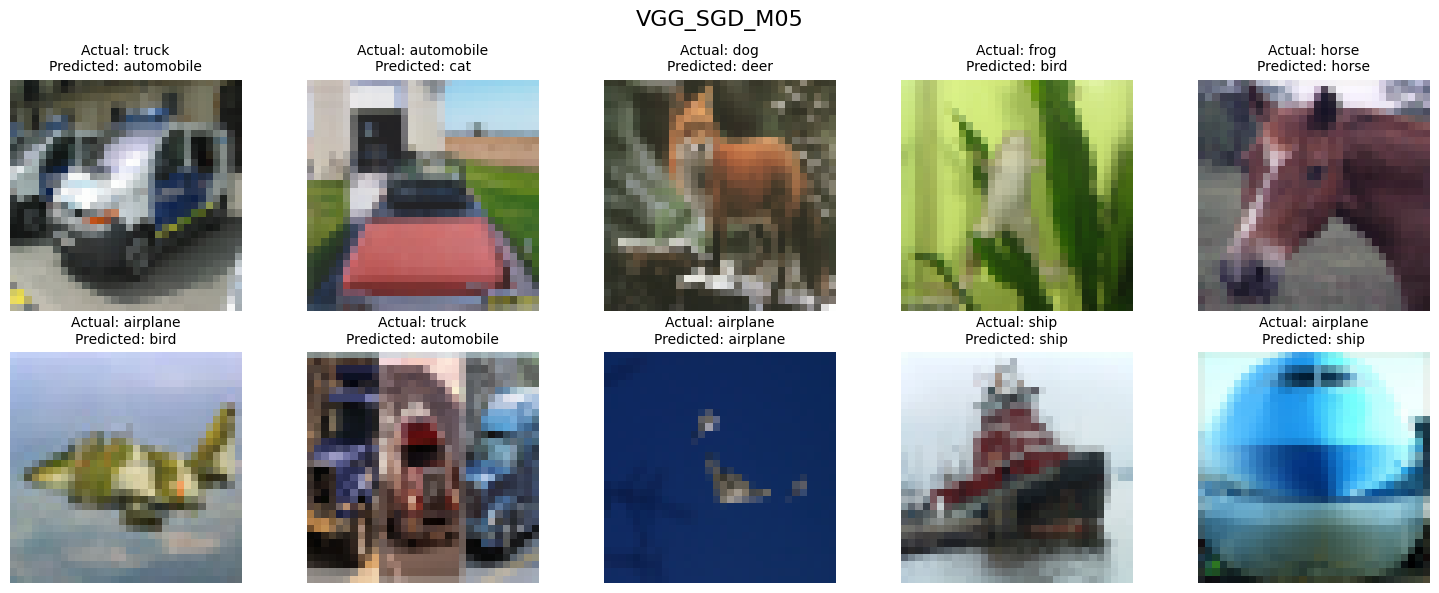

In [85]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG SGD 10 epochs


In [86]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [87]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [88]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=10
)

Epoch 0/9
----------
train Loss: 1.5097 Acc: 0.4410
valid Loss: 1.3938 Acc: 0.5008

Epoch 1/9
----------
train Loss: 1.1696 Acc: 0.5844
valid Loss: 1.0613 Acc: 0.6228

Epoch 2/9
----------
train Loss: 1.0179 Acc: 0.6438
valid Loss: 0.9638 Acc: 0.6635

Epoch 3/9
----------
train Loss: 0.9099 Acc: 0.6836
valid Loss: 0.9296 Acc: 0.6752

Epoch 4/9
----------
train Loss: 0.8267 Acc: 0.7134
valid Loss: 0.8304 Acc: 0.7071

Epoch 5/9
----------
train Loss: 0.7575 Acc: 0.7340
valid Loss: 0.8284 Acc: 0.7105

Epoch 6/9
----------
train Loss: 0.6952 Acc: 0.7571
valid Loss: 0.8071 Acc: 0.7208

Epoch 7/9
----------
train Loss: 0.5079 Acc: 0.8234
valid Loss: 0.6796 Acc: 0.7608

Epoch 8/9
----------
train Loss: 0.4483 Acc: 0.8455
valid Loss: 0.6811 Acc: 0.7621

Epoch 9/9
----------
train Loss: 0.4068 Acc: 0.8597
valid Loss: 0.6896 Acc: 0.7608

Training complete in 27m 48s
Best val Acc: 0.762100


In [89]:
title = 'VGG_SGD_EPOCHS10'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

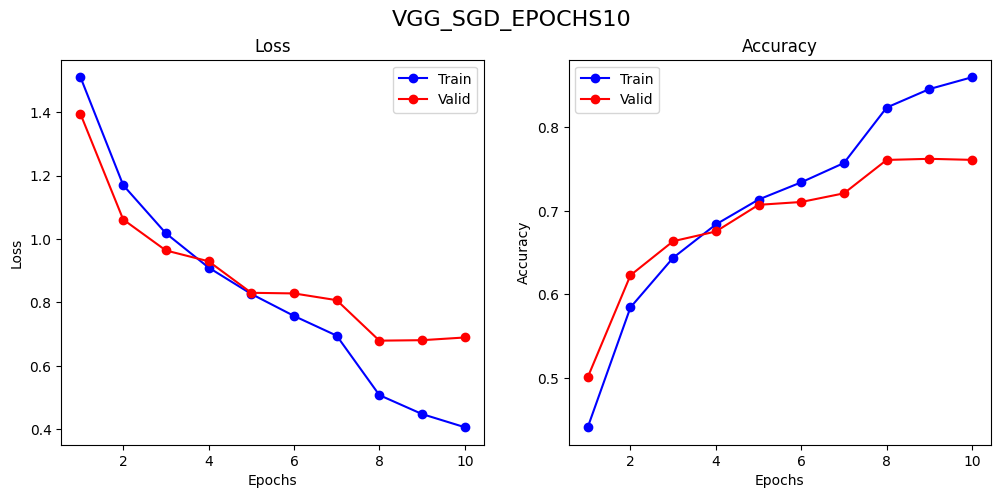

In [90]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [91]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7582

Classification Report:
              precision    recall  f1-score   support

    airplane       0.84      0.84      0.84      9000
  automobile       0.83      0.76      0.80      9000
        bird       0.70      0.75      0.73      9000
         cat       0.63      0.66      0.64      9000
        deer       0.69      0.71      0.70      9000
         dog       0.66      0.55      0.60      9000
        frog       0.84      0.85      0.85      9000
       horse       0.81      0.81      0.81      9000
        ship       0.79      0.86      0.82      9000
       truck       0.79      0.79      0.79      9000

    accuracy                           0.76     90000
   macro avg       0.76      0.76      0.76     90000
weighted avg       0.76      0.76      0.76     90000



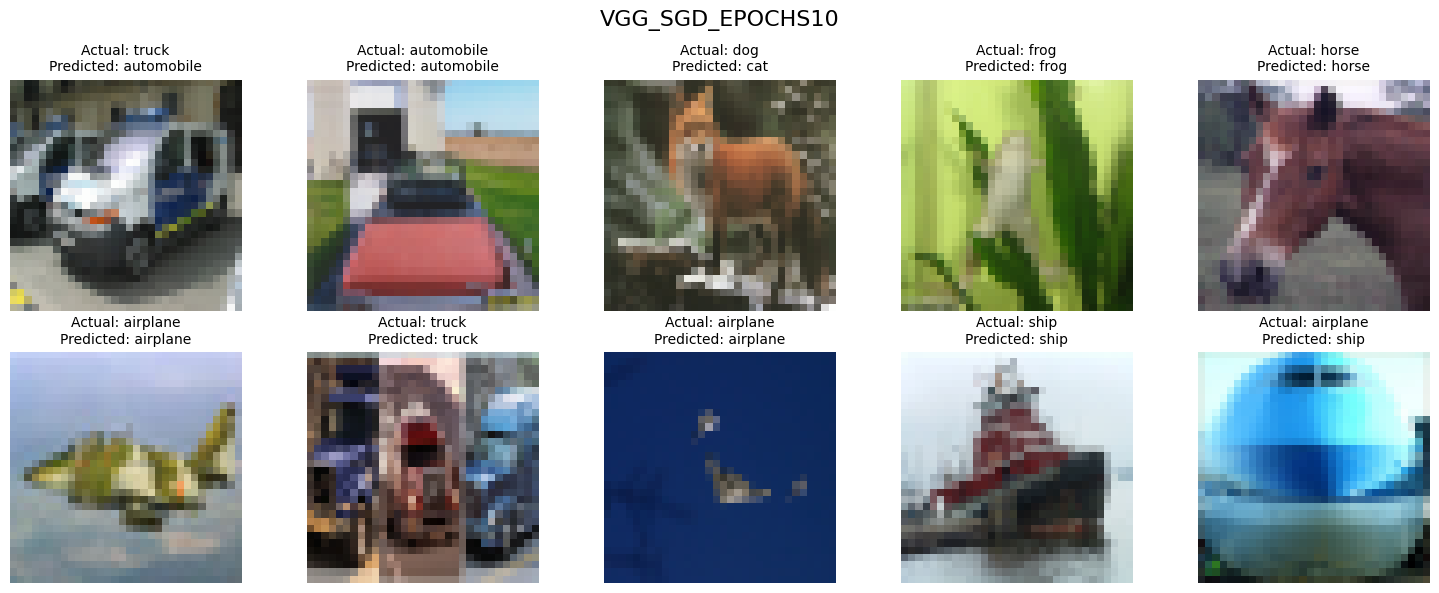

In [92]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG SGD 40 epochs


In [93]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [94]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [95]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=40
)

Epoch 0/39
----------
train Loss: 1.5165 Acc: 0.4365
valid Loss: 1.2706 Acc: 0.5379

Epoch 1/39
----------
train Loss: 1.1693 Acc: 0.5825
valid Loss: 1.0548 Acc: 0.6192

Epoch 2/39
----------
train Loss: 1.0193 Acc: 0.6435
valid Loss: 0.9927 Acc: 0.6516

Epoch 3/39
----------
train Loss: 0.9118 Acc: 0.6817
valid Loss: 0.9039 Acc: 0.6837

Epoch 4/39
----------
train Loss: 0.8313 Acc: 0.7137
valid Loss: 0.8496 Acc: 0.6988

Epoch 5/39
----------
train Loss: 0.7599 Acc: 0.7347
valid Loss: 0.8520 Acc: 0.6987

Epoch 6/39
----------
train Loss: 0.7014 Acc: 0.7566
valid Loss: 0.8294 Acc: 0.7136

Epoch 7/39
----------
train Loss: 0.5104 Acc: 0.8237
valid Loss: 0.6801 Acc: 0.7602

Epoch 8/39
----------
train Loss: 0.4517 Acc: 0.8445
valid Loss: 0.6835 Acc: 0.7614

Epoch 9/39
----------
train Loss: 0.4103 Acc: 0.8589
valid Loss: 0.6913 Acc: 0.7607

Epoch 10/39
----------
train Loss: 0.3740 Acc: 0.8712
valid Loss: 0.7111 Acc: 0.7601

Epoch 11/39
----------
train Loss: 0.3386 Acc: 0.8831
valid Loss

In [96]:
title = 'VGG_SGD_EPOCHS40'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

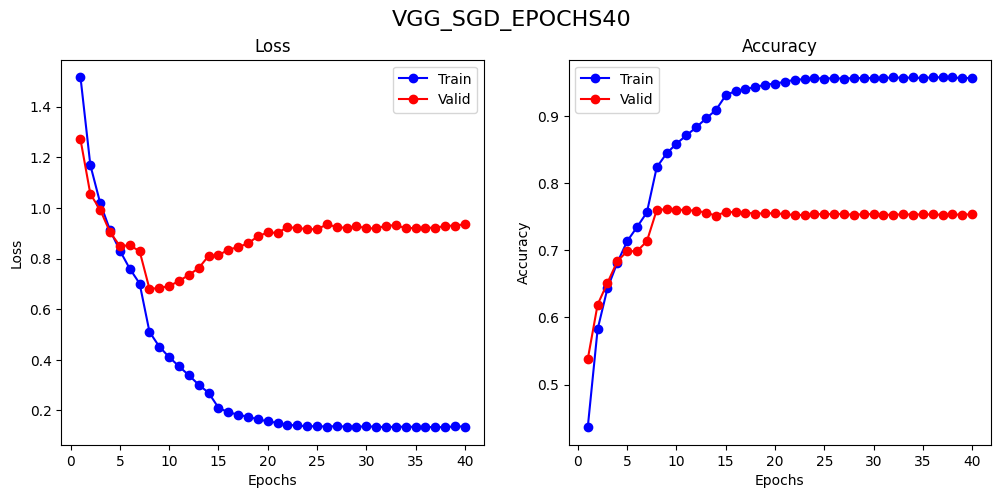

In [97]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [98]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7574

Classification Report:
              precision    recall  f1-score   support

    airplane       0.84      0.83      0.84      9000
  automobile       0.81      0.78      0.80      9000
        bird       0.72      0.75      0.73      9000
         cat       0.66      0.63      0.64      9000
        deer       0.66      0.74      0.70      9000
         dog       0.65      0.55      0.59      9000
        frog       0.85      0.85      0.85      9000
       horse       0.80      0.80      0.80      9000
        ship       0.78      0.86      0.82      9000
       truck       0.78      0.78      0.78      9000

    accuracy                           0.76     90000
   macro avg       0.76      0.76      0.76     90000
weighted avg       0.76      0.76      0.76     90000



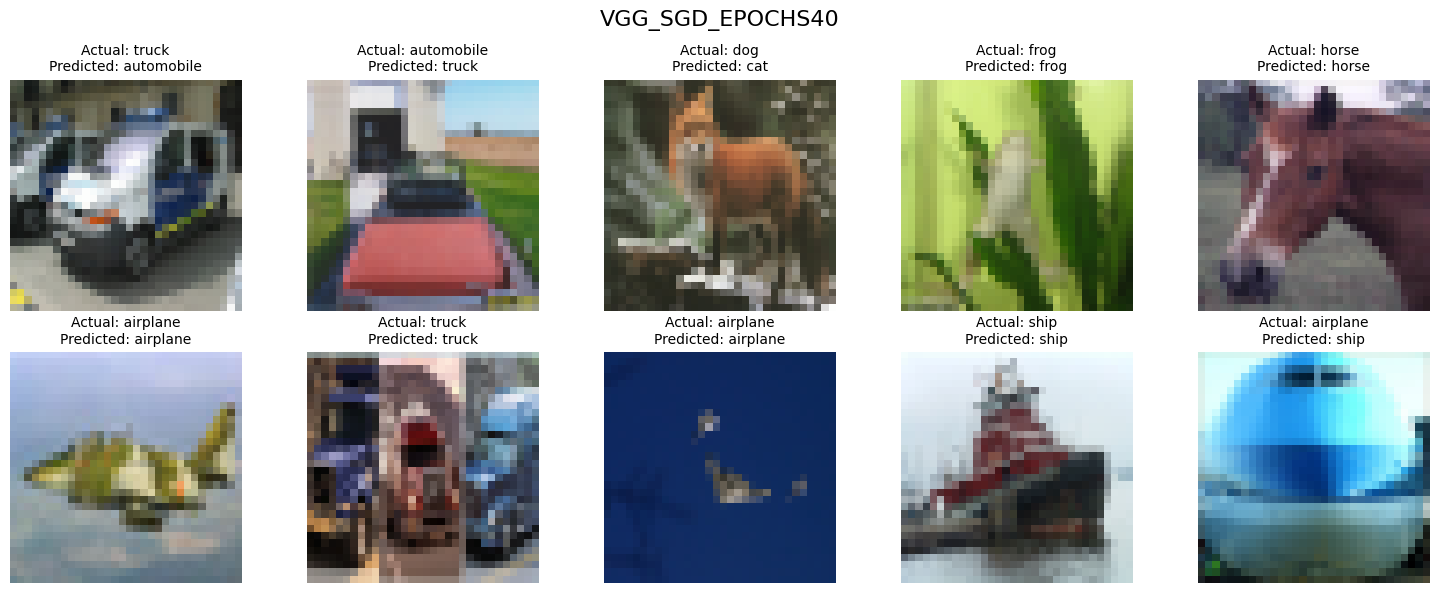

In [99]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Augmentation


In [100]:
from torchvision import transforms

In [101]:
cinic_mean = [0.47889522, 0.47227842, 0.43047404]
cinic_std = [0.24205776, 0.23828046, 0.25874835]

### VGG SGD Augmentation = None


In [102]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [103]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = transform, test_transform=transform, valid_transform=transform)

In [104]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [105]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.1304 Acc: 0.1608
valid Loss: 2.0013 Acc: 0.1959

Epoch 1/19
----------
train Loss: 1.8879 Acc: 0.2636
valid Loss: 1.8804 Acc: 0.2800

Epoch 2/19
----------
train Loss: 1.7578 Acc: 0.3189
valid Loss: 1.7325 Acc: 0.3210

Epoch 3/19
----------
train Loss: 1.7006 Acc: 0.3390
valid Loss: 1.9172 Acc: 0.2925

Epoch 4/19
----------
train Loss: 1.6688 Acc: 0.3497
valid Loss: 1.7455 Acc: 0.3275

Epoch 5/19
----------
train Loss: 1.6522 Acc: 0.3611
valid Loss: 1.6273 Acc: 0.3755

Epoch 6/19
----------
train Loss: 1.6379 Acc: 0.3712
valid Loss: 1.5992 Acc: 0.3956

Epoch 7/19
----------
train Loss: 1.3332 Acc: 0.4983
valid Loss: 1.2213 Acc: 0.5403

Epoch 8/19
----------
train Loss: 1.2386 Acc: 0.5477
valid Loss: 1.1766 Acc: 0.5673

Epoch 9/19
----------
train Loss: 1.1856 Acc: 0.5719
valid Loss: 1.1344 Acc: 0.5925

Epoch 10/19
----------
train Loss: 1.1335 Acc: 0.5950
valid Loss: 1.1693 Acc: 0.5801

Epoch 11/19
----------
train Loss: 1.0926 Acc: 0.6120
valid Loss

In [106]:
title = 'VGG_SGD_AUG_NONE'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

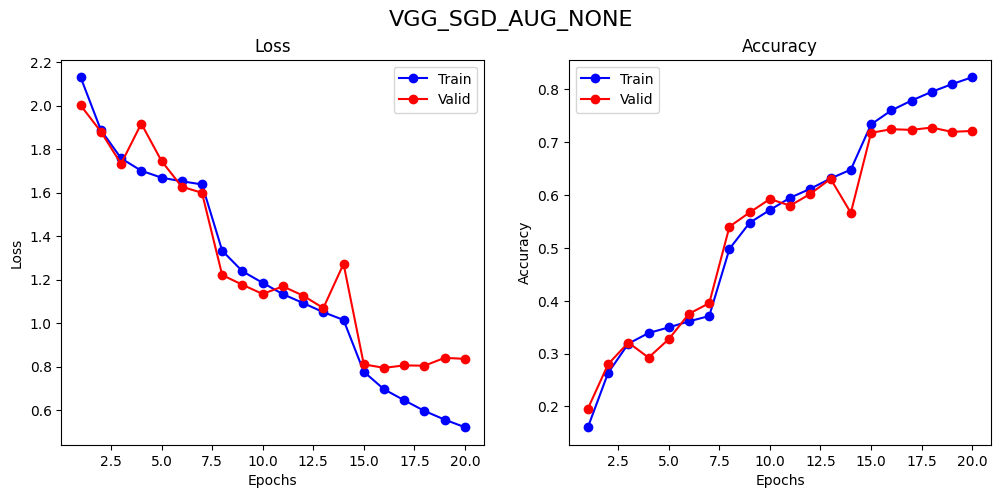

In [107]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [108]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7256

Classification Report:
              precision    recall  f1-score   support

    airplane       0.81      0.83      0.82      9000
  automobile       0.81      0.76      0.79      9000
        bird       0.66      0.71      0.68      9000
         cat       0.63      0.56      0.59      9000
        deer       0.63      0.71      0.67      9000
         dog       0.62      0.51      0.56      9000
        frog       0.78      0.83      0.80      9000
       horse       0.81      0.75      0.78      9000
        ship       0.76      0.83      0.79      9000
       truck       0.74      0.77      0.76      9000

    accuracy                           0.73     90000
   macro avg       0.72      0.73      0.72     90000
weighted avg       0.72      0.73      0.72     90000



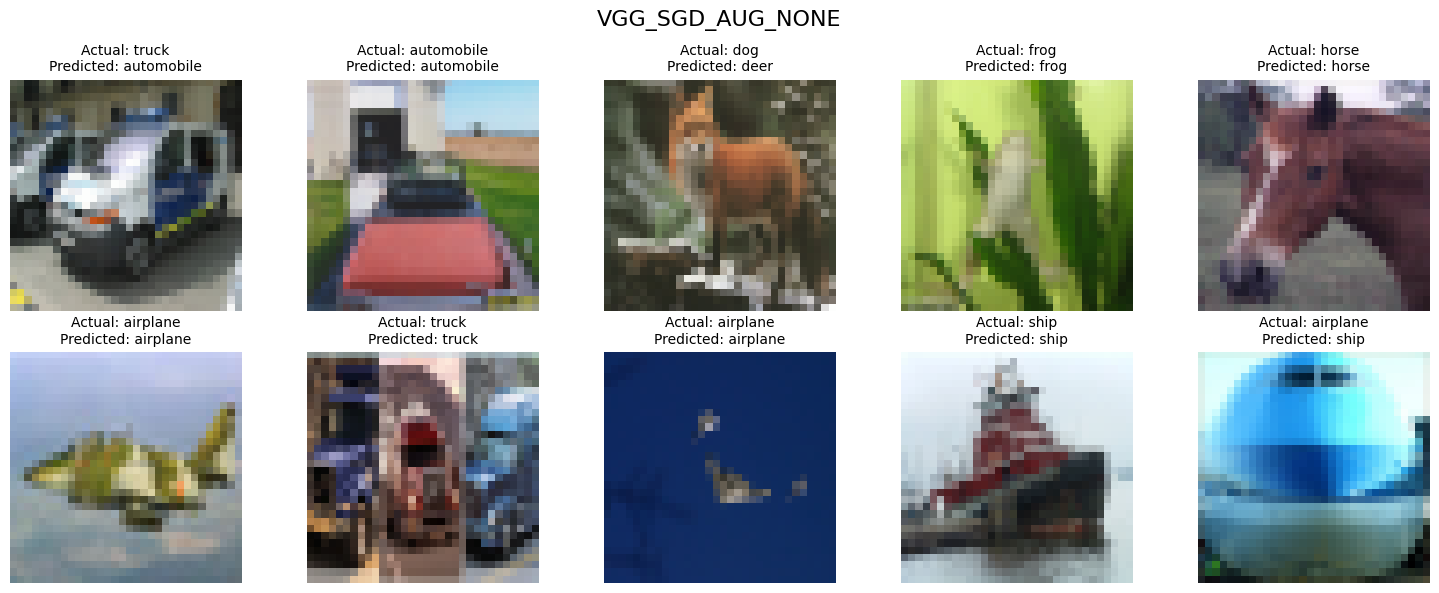

In [109]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG SGD Augmentation = ColorJitter


In [110]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [111]:
train_transform = transforms.Compose([
    transforms.ColorJitter(brightness=0.2, contrast=0.2), 
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [112]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [113]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.3191 Acc: 0.1002
valid Loss: 2.3031 Acc: 0.1000

Epoch 1/19
----------
train Loss: 2.3034 Acc: 0.0980
valid Loss: 2.3027 Acc: 0.1000

Epoch 2/19
----------
train Loss: 2.3033 Acc: 0.0984
valid Loss: 2.3032 Acc: 0.1000

Epoch 3/19
----------
train Loss: 2.3034 Acc: 0.0975
valid Loss: 2.3032 Acc: 0.1000

Epoch 4/19
----------
train Loss: 2.3032 Acc: 0.0996
valid Loss: 2.3035 Acc: 0.1000

Epoch 5/19
----------
train Loss: 2.3033 Acc: 0.1002
valid Loss: 2.3029 Acc: 0.1000

Epoch 6/19
----------
train Loss: 2.3033 Acc: 0.0996
valid Loss: 2.3033 Acc: 0.1000

Epoch 7/19
----------
train Loss: 2.3028 Acc: 0.0989
valid Loss: 2.3026 Acc: 0.1000

Epoch 8/19
----------
train Loss: 2.3027 Acc: 0.1000
valid Loss: 2.3026 Acc: 0.1000

Epoch 9/19
----------
train Loss: 2.3027 Acc: 0.0982
valid Loss: 2.3026 Acc: 0.1000

Epoch 10/19
----------
train Loss: 2.3027 Acc: 0.0975
valid Loss: 2.3026 Acc: 0.1000

Epoch 11/19
----------
train Loss: 2.3027 Acc: 0.0983
valid Loss

In [114]:
title = 'VGG_SGD_AUG_ColorJitter'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

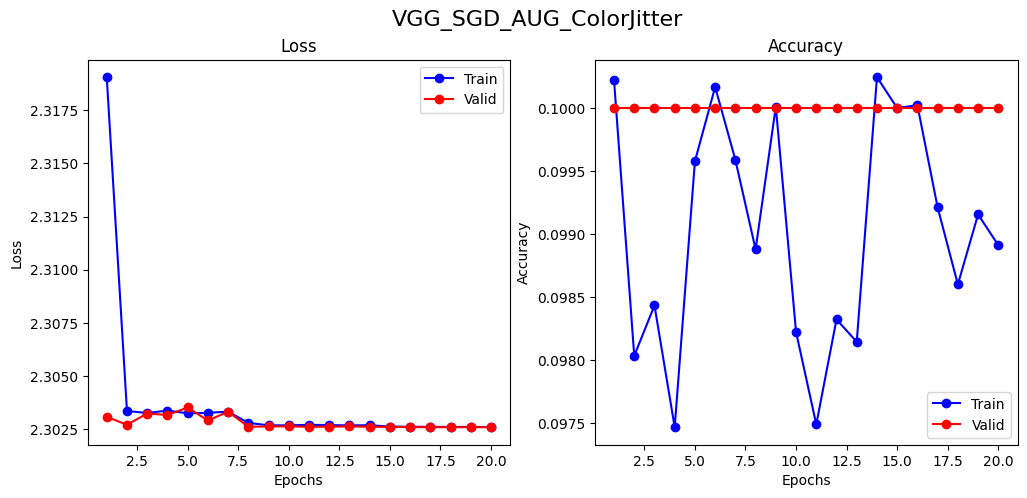

In [115]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [116]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.1000

Classification Report:
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      9000
  automobile       0.00      0.00      0.00      9000
        bird       0.00      0.00      0.00      9000
         cat       0.00      0.00      0.00      9000
        deer       0.00      0.00      0.00      9000
         dog       0.00      0.00      0.00      9000
        frog       0.00      0.00      0.00      9000
       horse       0.10      1.00      0.18      9000
        ship       0.00      0.00      0.00      9000
       truck       0.00      0.00      0.00      9000

    accuracy                           0.10     90000
   macro avg       0.01      0.10      0.02     90000
weighted avg       0.01      0.10      0.02     90000



C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

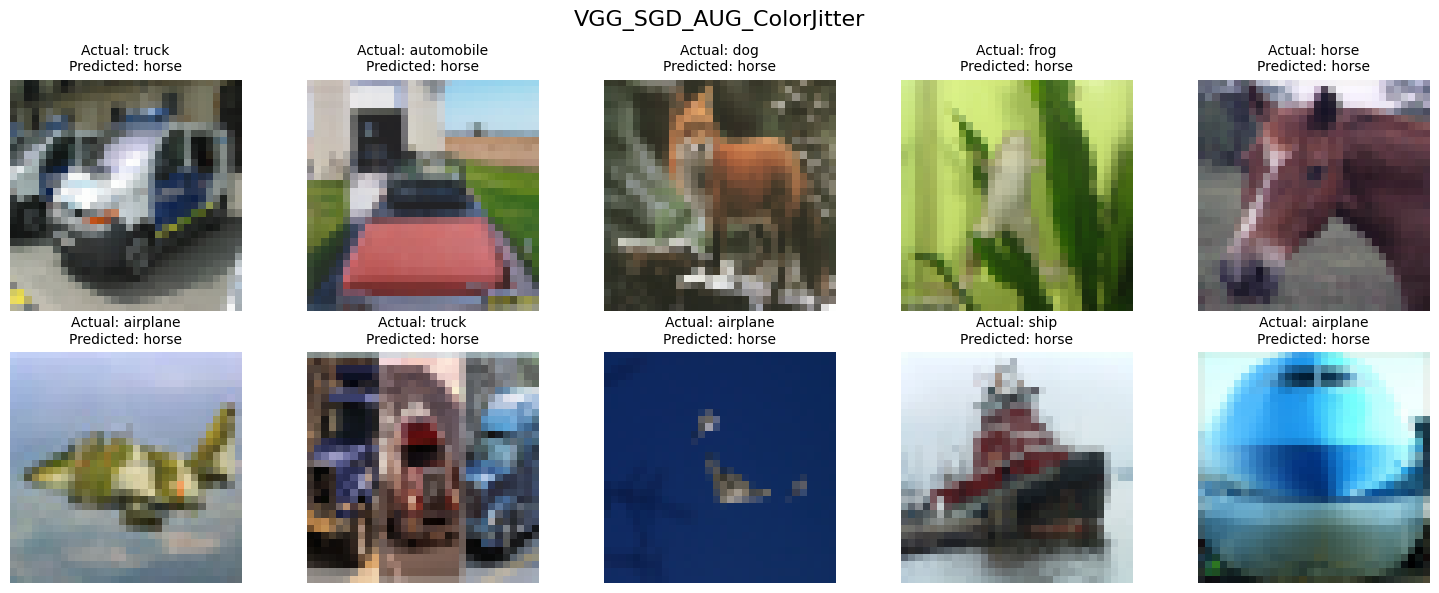

In [117]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG SGD Augmentation = Gray Scale + GaussianBlur


In [118]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [119]:
train_transform = transforms.Compose([
    transforms.RandomGrayscale(p=0.1),
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [120]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [121]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.3199 Acc: 0.1004
valid Loss: 2.3031 Acc: 0.1000

Epoch 1/19
----------
train Loss: 2.3034 Acc: 0.0981
valid Loss: 2.3027 Acc: 0.1000

Epoch 2/19
----------
train Loss: 2.3033 Acc: 0.0984
valid Loss: 2.3032 Acc: 0.1000

Epoch 3/19
----------
train Loss: 2.3034 Acc: 0.0975
valid Loss: 2.3032 Acc: 0.1000

Epoch 4/19
----------
train Loss: 2.3032 Acc: 0.0996
valid Loss: 2.3035 Acc: 0.1000

Epoch 5/19
----------
train Loss: 2.3033 Acc: 0.1002
valid Loss: 2.3029 Acc: 0.1000

Epoch 6/19
----------
train Loss: 2.3033 Acc: 0.0996
valid Loss: 2.3033 Acc: 0.1000

Epoch 7/19
----------
train Loss: 2.3028 Acc: 0.0989
valid Loss: 2.3026 Acc: 0.1000

Epoch 8/19
----------
train Loss: 2.3027 Acc: 0.1000
valid Loss: 2.3026 Acc: 0.1000

Epoch 9/19
----------
train Loss: 2.3027 Acc: 0.0982
valid Loss: 2.3026 Acc: 0.1000

Epoch 10/19
----------
train Loss: 2.3027 Acc: 0.0975
valid Loss: 2.3026 Acc: 0.1000

Epoch 11/19
----------
train Loss: 2.3027 Acc: 0.0983
valid Loss

In [122]:
title = 'VGG_SGD_AUG_Grayscale_Blur'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

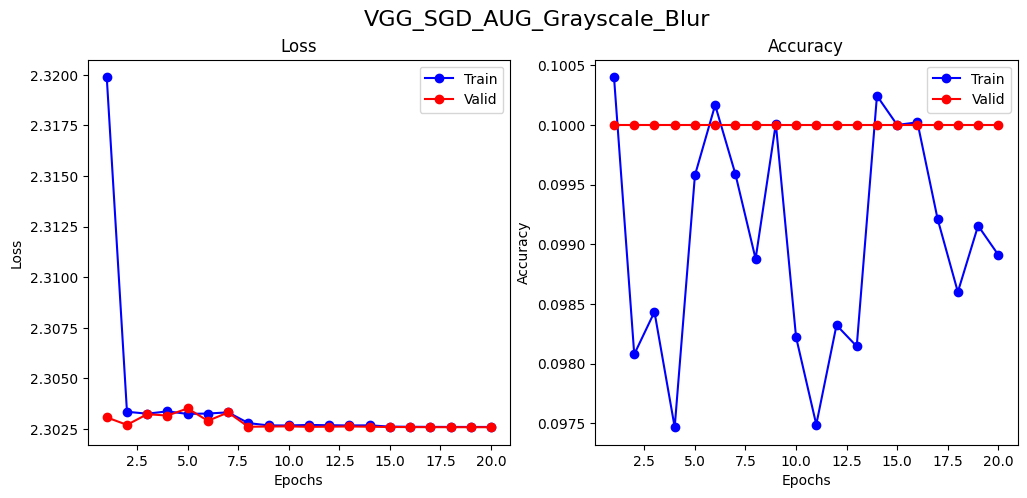

In [123]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [124]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.1000

Classification Report:
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      9000
  automobile       0.00      0.00      0.00      9000
        bird       0.00      0.00      0.00      9000
         cat       0.00      0.00      0.00      9000
        deer       0.00      0.00      0.00      9000
         dog       0.00      0.00      0.00      9000
        frog       0.00      0.00      0.00      9000
       horse       0.10      1.00      0.18      9000
        ship       0.00      0.00      0.00      9000
       truck       0.00      0.00      0.00      9000

    accuracy                           0.10     90000
   macro avg       0.01      0.10      0.02     90000
weighted avg       0.01      0.10      0.02     90000



C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

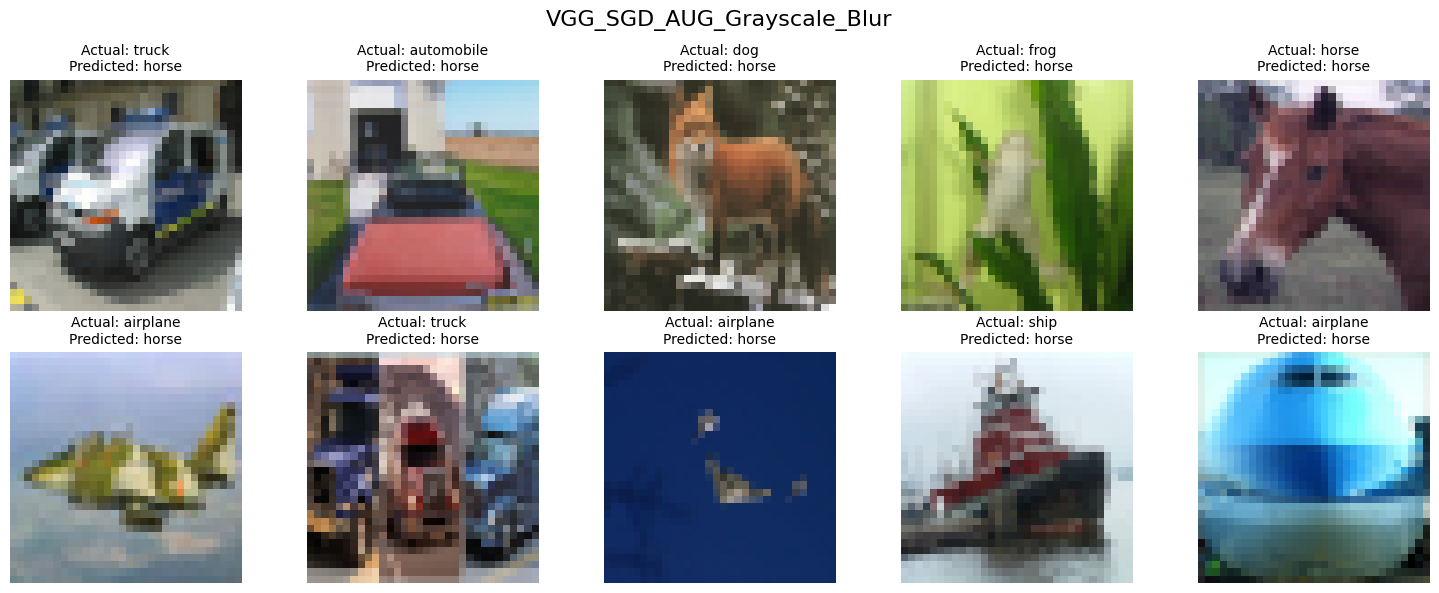

In [125]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG SGD Augmentation = RandomHorizontalFlip + RandomCrop


In [126]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [127]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4), 
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [128]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [129]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.1074 Acc: 0.1685
valid Loss: 1.9560 Acc: 0.1979

Epoch 1/19
----------
train Loss: 1.9586 Acc: 0.2072
valid Loss: 1.9813 Acc: 0.2121

Epoch 2/19
----------
train Loss: 1.9339 Acc: 0.2293
valid Loss: 1.9967 Acc: 0.2366

Epoch 3/19
----------
train Loss: 1.8675 Acc: 0.2759
valid Loss: 1.7833 Acc: 0.2900

Epoch 4/19
----------
train Loss: 1.7834 Acc: 0.3112
valid Loss: 1.7863 Acc: 0.2973

Epoch 5/19
----------
train Loss: 1.7477 Acc: 0.3235
valid Loss: 1.8193 Acc: 0.3031

Epoch 6/19
----------
train Loss: 1.7266 Acc: 0.3291
valid Loss: 1.6567 Acc: 0.3431

Epoch 7/19
----------
train Loss: 1.4647 Acc: 0.4319
valid Loss: 1.3206 Acc: 0.4999

Epoch 8/19
----------
train Loss: 1.3562 Acc: 0.4979
valid Loss: 1.2554 Acc: 0.5350

Epoch 9/19
----------
train Loss: 1.2958 Acc: 0.5300
valid Loss: 1.2375 Acc: 0.5510

Epoch 10/19
----------
train Loss: 1.2435 Acc: 0.5539
valid Loss: 1.2977 Acc: 0.5247

Epoch 11/19
----------
train Loss: 1.2040 Acc: 0.5708
valid Loss

In [130]:
title = 'VGG_SGD_AUG_HorizontalFlip_Crop'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

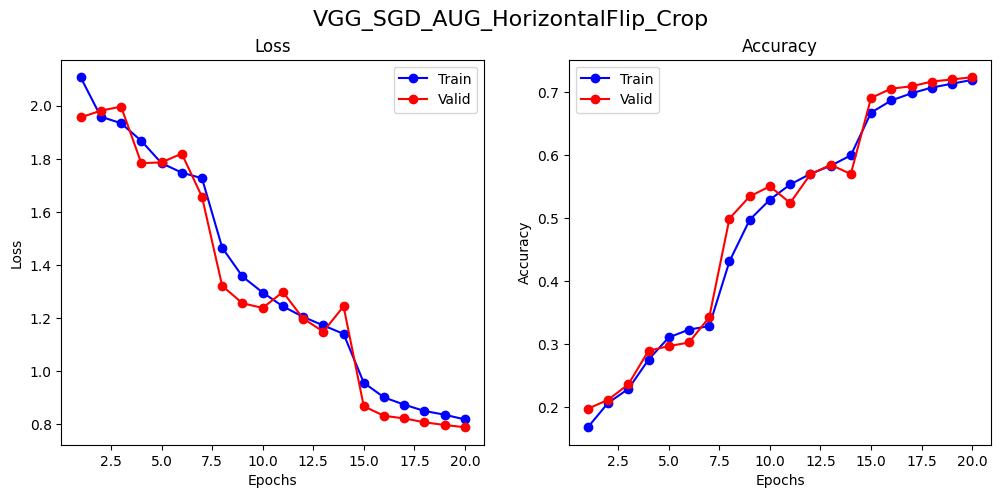

In [131]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [132]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7218

Classification Report:
              precision    recall  f1-score   support

    airplane       0.88      0.75      0.81      9000
  automobile       0.78      0.81      0.79      9000
        bird       0.73      0.62      0.67      9000
         cat       0.55      0.65      0.59      9000
        deer       0.61      0.71      0.66      9000
         dog       0.60      0.49      0.54      9000
        frog       0.77      0.86      0.81      9000
       horse       0.83      0.74      0.78      9000
        ship       0.75      0.84      0.79      9000
       truck       0.77      0.75      0.76      9000

    accuracy                           0.72     90000
   macro avg       0.73      0.72      0.72     90000
weighted avg       0.73      0.72      0.72     90000



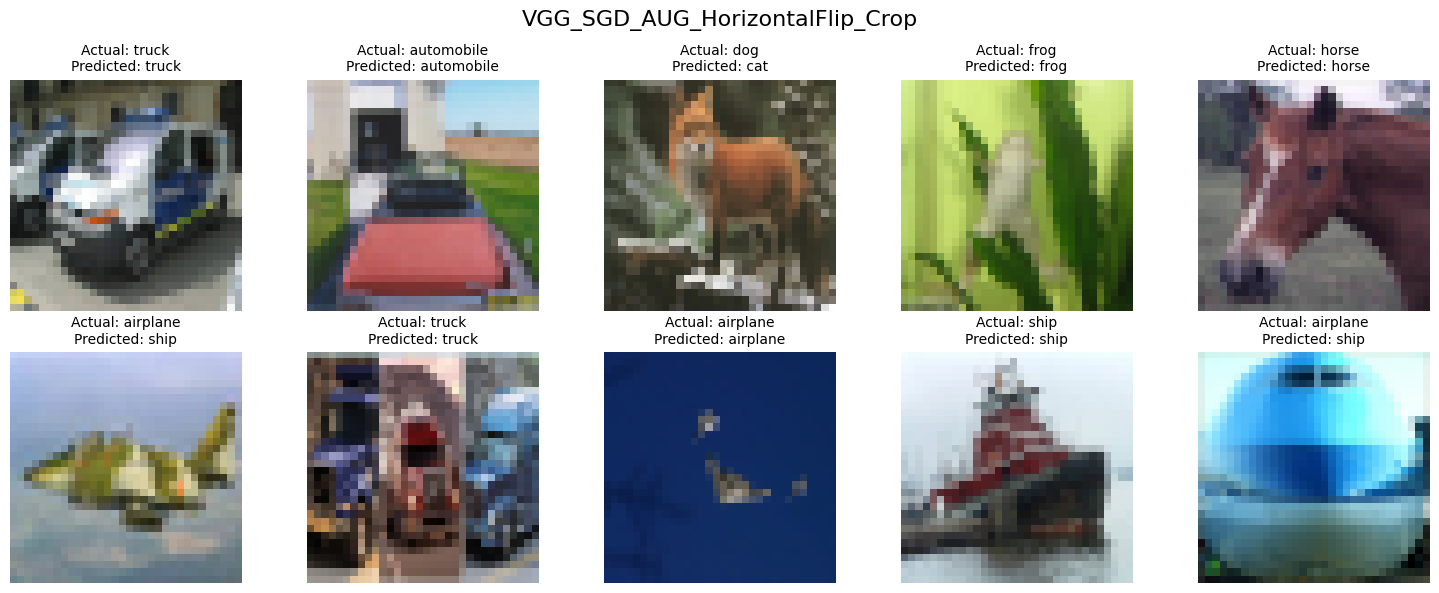

In [133]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### Advanced - VGG SGD Augmentation = Auto Augment


In [134]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [135]:
from torchvision.transforms import autoaugment

train_transform = transforms.Compose([
    autoaugment.AutoAugment(
        policy=autoaugment.AutoAugmentPolicy.CIFAR10,
        interpolation=transforms.InterpolationMode.BILINEAR,
    ),
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [136]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [137]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.3166 Acc: 0.1001
valid Loss: 2.3031 Acc: 0.1000

Epoch 1/19
----------
train Loss: 2.3034 Acc: 0.0980
valid Loss: 2.3027 Acc: 0.1000

Epoch 2/19
----------
train Loss: 2.3033 Acc: 0.0984
valid Loss: 2.3032 Acc: 0.1000

Epoch 3/19
----------
train Loss: 2.3034 Acc: 0.0975
valid Loss: 2.3032 Acc: 0.1000

Epoch 4/19
----------
train Loss: 2.3032 Acc: 0.0996
valid Loss: 2.3035 Acc: 0.1000

Epoch 5/19
----------
train Loss: 2.3033 Acc: 0.1002
valid Loss: 2.3029 Acc: 0.1000

Epoch 6/19
----------
train Loss: 2.3033 Acc: 0.0996
valid Loss: 2.3033 Acc: 0.1000

Epoch 7/19
----------
train Loss: 2.3028 Acc: 0.0989
valid Loss: 2.3026 Acc: 0.1000

Epoch 8/19
----------
train Loss: 2.3027 Acc: 0.1000
valid Loss: 2.3026 Acc: 0.1000

Epoch 9/19
----------
train Loss: 2.3027 Acc: 0.0982
valid Loss: 2.3026 Acc: 0.1000

Epoch 10/19
----------
train Loss: 2.3027 Acc: 0.0975
valid Loss: 2.3026 Acc: 0.1000

Epoch 11/19
----------
train Loss: 2.3027 Acc: 0.0983
valid Loss

In [138]:
title = 'VGG_SGD_AUG_AUTO'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

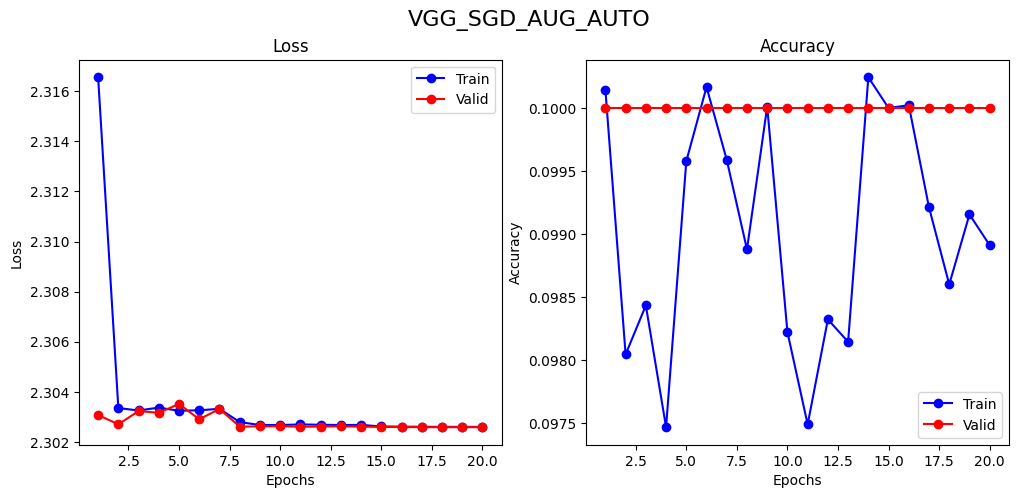

In [139]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [140]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.1000

Classification Report:
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      9000
  automobile       0.00      0.00      0.00      9000
        bird       0.00      0.00      0.00      9000
         cat       0.00      0.00      0.00      9000
        deer       0.00      0.00      0.00      9000
         dog       0.00      0.00      0.00      9000
        frog       0.00      0.00      0.00      9000
       horse       0.10      1.00      0.18      9000
        ship       0.00      0.00      0.00      9000
       truck       0.00      0.00      0.00      9000

    accuracy                           0.10     90000
   macro avg       0.01      0.10      0.02     90000
weighted avg       0.01      0.10      0.02     90000



C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

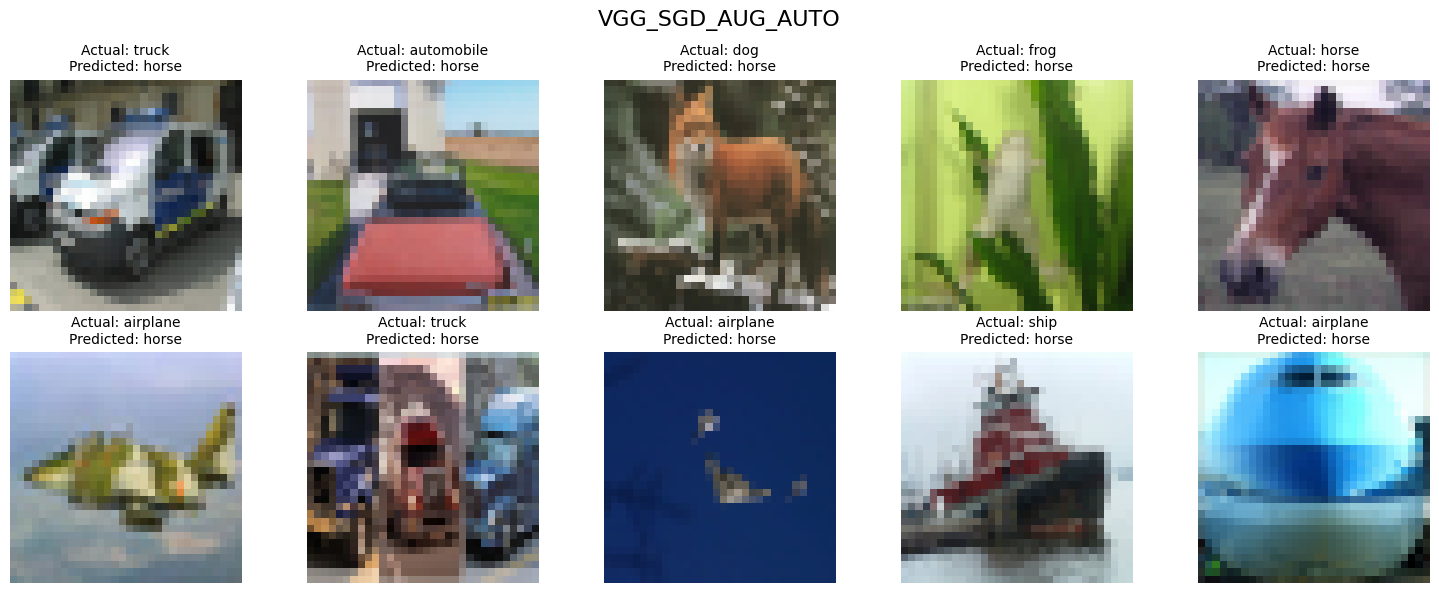

In [141]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### Advanced - VGG SGD Augmentation = Auto Augment 40 Epochs


In [142]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [143]:
from torchvision.transforms import autoaugment

train_transform = transforms.Compose([
    autoaugment.AutoAugment(
        policy=autoaugment.AutoAugmentPolicy.CIFAR10,
        interpolation=transforms.InterpolationMode.BILINEAR,
    ),
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [144]:
model = VGG(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [145]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=40
)

Epoch 0/39
----------
train Loss: 2.3149 Acc: 0.0999
valid Loss: 2.3031 Acc: 0.1000

Epoch 1/39
----------
train Loss: 2.3034 Acc: 0.0980
valid Loss: 2.3027 Acc: 0.1000

Epoch 2/39
----------
train Loss: 2.3033 Acc: 0.0984
valid Loss: 2.3032 Acc: 0.1000

Epoch 3/39
----------
train Loss: 2.3034 Acc: 0.0975
valid Loss: 2.3032 Acc: 0.1000

Epoch 4/39
----------
train Loss: 2.3032 Acc: 0.0996
valid Loss: 2.3035 Acc: 0.1000

Epoch 5/39
----------
train Loss: 2.3033 Acc: 0.1002
valid Loss: 2.3029 Acc: 0.1000

Epoch 6/39
----------
train Loss: 2.3033 Acc: 0.0996
valid Loss: 2.3033 Acc: 0.1000

Epoch 7/39
----------
train Loss: 2.3028 Acc: 0.0989
valid Loss: 2.3026 Acc: 0.1000

Epoch 8/39
----------
train Loss: 2.3027 Acc: 0.1000
valid Loss: 2.3026 Acc: 0.1000

Epoch 9/39
----------
train Loss: 2.3027 Acc: 0.0982
valid Loss: 2.3026 Acc: 0.1000

Epoch 10/39
----------
train Loss: 2.3027 Acc: 0.0975
valid Loss: 2.3026 Acc: 0.1000

Epoch 11/39
----------
train Loss: 2.3027 Acc: 0.0983
valid Loss

In [146]:
title = 'VGG_SGD_AUG_AUTO_EPOCHS40'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

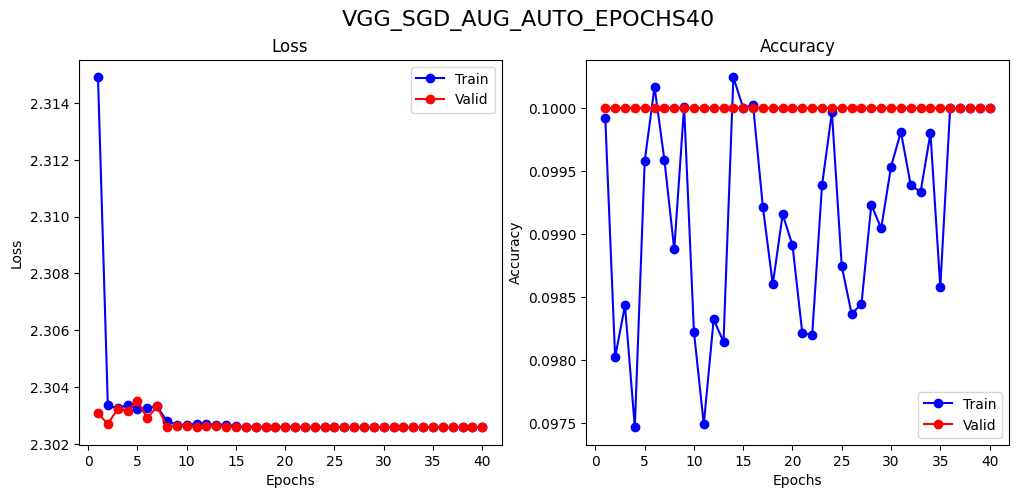

In [147]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [148]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.1000

Classification Report:
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      9000
  automobile       0.00      0.00      0.00      9000
        bird       0.00      0.00      0.00      9000
         cat       0.00      0.00      0.00      9000
        deer       0.00      0.00      0.00      9000
         dog       0.00      0.00      0.00      9000
        frog       0.00      0.00      0.00      9000
       horse       0.10      1.00      0.18      9000
        ship       0.00      0.00      0.00      9000
       truck       0.00      0.00      0.00      9000

    accuracy                           0.10     90000
   macro avg       0.01      0.10      0.02     90000
weighted avg       0.01      0.10      0.02     90000



C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

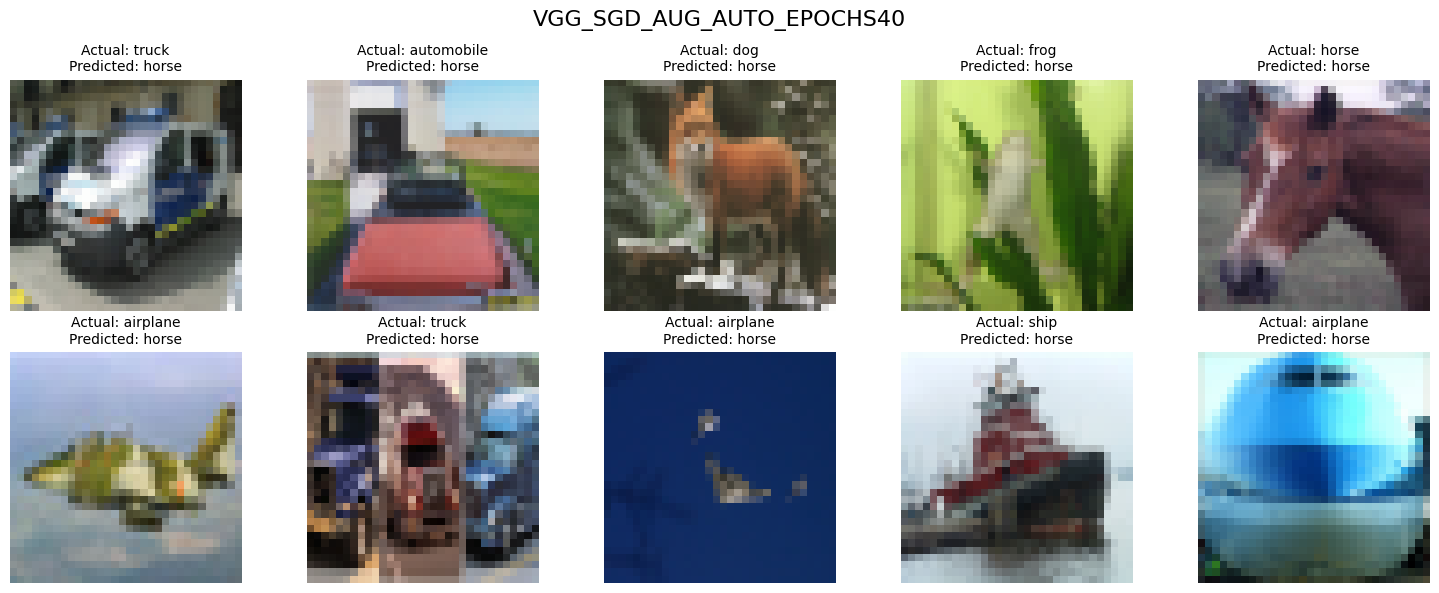

In [149]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)